Import libraries and data

In [2]:
import pandas as pd
import numpy as np
import rasterio
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, KFold
import joblib
import optuna
import matplotlib.pyplot as plt 

# Load data from xls file
data = pd.read_excel("MP-S1.xlsx")

# Separate features and target
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values


Building model and optimizing the hyperparameters 

In [2]:
# Define objective function for Optuna optimization
def objective(trial):
    # Set hyperparameters to optimize
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (50,50), (100,50), (20,60,10), 
                                                                          (5,10,20), (100, 5, 20), (10, 10), (10, 15), (20,30)
                                                                         ,(25, 30), (40, 10, 20), (100, 50, 30), (200, 20, 10)])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'logistic'])
    solver = trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam'])
    alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'invscaling', 'adaptive'])
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    batch_size = trial.suggest_int('batch_size', 32, 128)

    # Initialize ANN model with hyperparameters
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                         activation=activation,
                         solver=solver,
                         alpha=alpha,
                         learning_rate=learning_rate,
                         max_iter=max_iter, batch_size=batch_size,
                         random_state=42)

    # Set kfold for cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    # Calculate cross-validation score using R2 as evaluation metric
    score = cross_val_score(model, X, y, cv=kfold, scoring='r2')

    # Return mean of R2 scores as objective value
    return score.mean()

# Run Optuna optimization to find best hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1000, show_progress_bar=True)

# Print best hyperparameters found by Optuna
print("Best hyperparameters: ", study.best_params)


[I 2023-03-03 17:57:54,714] A new study created in memory with name: no-name-183ccc67-8835-4e48-aa25-ac6b2a5ac6d5
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:57:58,493] Trial 0 finished with value: -0.6620312669123979 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.014621743796386755, 'learning_rate': 'adaptive', 'max_iter': 745, 'batch_size': 32}. Best is trial 0 with value: -0.6620312669123979.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:57:59,591] Trial 1 finished with value: -0.30762408828216276 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.030626963979695956, 'learning_rate': 'invscaling', 'max_iter': 488, 'batch_size': 90}. Best is trial 1 with value: -0.30762408828216276.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:58:01,485] Trial 2 finished with value: -0.1661308480823 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.000509562533797311, 'learning_rate': 'invscaling', 'max_iter': 528, 'batch_size': 39}. Best is trial 2 with value: -0.1661308480823.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:58:02,273] Trial 3 finished with value: -0.5849889492257034 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.00023102180031522217, 'learning_rate': 'adaptive', 'max_iter': 367, 'batch_size': 58}. Best is trial 2 with value: -0.1661308480823.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:58:03,925] Trial 4 finished with value: -1.0777696907142773 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.03380729720822541, 'learning_rate': 'invscaling', 'max_iter': 502, 'batch_size': 121}. Best is trial 2 with value: -0.1661308480823.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:58:06,100] Trial 5 finished with value: -1.2653047747695507 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.0014742408145518, 'learning_rate': 'invscaling', 'max_iter': 665, 'batch_size': 40}. Best is trial 2 with value: -0.1661308480823.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[I 2023-03-03 17:58:06,590] Trial 6 finished with value: -0.35268684669610517 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.03339530126993685, 'learning_rate': 'invscaling', 'max_iter': 939, 'batch_size': 106}. Best is trial 2 with value: -0.1661308480823.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:06,817] Trial 7 finished with value: -0.18779399736380725 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00157973531643255, 'learning_rate': 'invscaling', 'max_iter': 984, 'batch_size': 99}. Best is trial 2 with value: -0.1661308480823.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:07,467] Trial 8 finished with value: -0.1438117556663132 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08833186976624254, 'learning_rate': 'constant', 'max_iter': 364, 'batch_size': 55}. Best is trial 8 with value: -0.1438117556663132.
[I 2023-03-03 17:58:07,786] Trial 9 finished with value: -0.3014784544003756 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.014092474182235823, 'learning_rate': 'constant', 'max_iter': 929, 'batch_size': 95}. Best is trial 8 with value: -0.1438117556663132.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:08,098] Trial 10 finished with value: -0.1474026928277592 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06741884035812959, 'learning_rate': 'constant', 'max_iter': 166, 'batch_size': 64}. Best is trial 8 with value: -0.1438117556663132.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (131) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (131) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:58:08,365] Trial 11 finished with value: -0.13094741107415322 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09218566183258657, 'learning_rate': 'constant', 'max_iter': 131, 'batch_size': 67}. Best is trial 11 with value: -0.13094741107415322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (167) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer:

[I 2023-03-03 17:58:08,693] Trial 12 finished with value: -0.1488904309872799 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.006584086681978349, 'learning_rate': 'constant', 'max_iter': 167, 'batch_size': 72}. Best is trial 11 with value: -0.13094741107415322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (308) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (308) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 17:58:09,261] Trial 13 finished with value: -0.14329164615838894 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09621008148481751, 'learning_rate': 'constant', 'max_iter': 308, 'batch_size': 55}. Best is trial 11 with value: -0.13094741107415322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (296) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (296) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:58:09,978] Trial 14 finished with value: -2.2794465882127843 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07135510327936966, 'learning_rate': 'constant', 'max_iter': 296, 'batch_size': 77}. Best is trial 11 with value: -0.13094741107415322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:10,427] Trial 15 finished with value: -0.1827101415828034 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.004877963306462477, 'learning_rate': 'constant', 'max_iter': 102, 'batch_size': 50}. Best is trial 11 with value: -0.13094741107415322.
[I 2023-03-03 17:58:10,499] Trial 16 finished with value: -0.3552575600154698 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.09333135317884456, 'learning_rate': 'constant', 'max_iter': 258, 'batch_size': 69}. Best is trial 11 with value: -0.13094741107415322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:10,948] Trial 17 finished with value: -0.1147494007537444 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.012948312077658487, 'learning_rate': 'constant', 'max_iter': 258, 'batch_size': 86}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (219) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (219) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 17:58:11,345] Trial 18 finished with value: -0.14908093218844629 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.011187361395739585, 'learning_rate': 'adaptive', 'max_iter': 219, 'batch_size': 84}. Best is trial 17 with value: -0.1147494007537444.
[I 2023-03-03 17:58:11,427] Trial 19 finished with value: -0.32763505947578186 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.002938969406630289, 'learning_rate': 'constant', 'max_iter': 121, 'batch_size': 111}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:12,081] Trial 20 finished with value: -0.14574846773446878 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0265928353659762, 'learning_rate': 'constant', 'max_iter': 401, 'batch_size': 83}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (294) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (294) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:58:12,491] Trial 21 finished with value: -0.14596492574685016 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05159950076430411, 'learning_rate': 'constant', 'max_iter': 294, 'batch_size': 63}. Best is trial 17 with value: -0.1147494007537444.
[I 2023-03-03 17:58:12,704] Trial 22 finished with value: -0.21008055958738653 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09505183811431636, 'learning_rate': 'constant', 'max_iter': 217, 'batch_size': 47}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:13,375] Trial 23 finished with value: -0.14591760206159368 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04777024235195177, 'learning_rate': 'constant', 'max_iter': 427, 'batch_size': 76}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (616) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (616) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 17:58:14,255] Trial 24 finished with value: -0.14589074436214094 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.02160538793554359, 'learning_rate': 'constant', 'max_iter': 616, 'batch_size': 67}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (327) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (327) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 17:58:14,794] Trial 25 finished with value: -0.14235645388890203 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04174015549985825, 'learning_rate': 'adaptive', 'max_iter': 327, 'batch_size': 88}. Best is trial 17 with value: -0.1147494007537444.
[I 2023-03-03 17:58:14,983] Trial 26 finished with value: -0.1649061159991903 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.048556822473355334, 'learning_rate': 'adaptive', 'max_iter': 207, 'batch_size': 87}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:15,508] Trial 27 finished with value: -0.35364644714921817 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.020711060407658695, 'learning_rate': 'adaptive', 'max_iter': 331, 'batch_size': 106}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 17:58:15,824] Trial 28 finished with value: -0.16857550094579052 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.009138948988822355, 'learning_rate': 'adaptive', 'max_iter': 437, 'batch_size': 93}. Best is trial 17 with value: -0.1147494007537444.
[I 2023-03-03 17:58:16,007] Trial 29 finished with value: -0.19433274393647673 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.018360773739852794, 'learning_rate': 'adaptive', 'max_iter': 617, 'batch_size': 79}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (266) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:58:16,256] Trial 30 finished with value: -1.0611492864669798 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.014247278930534254, 'learning_rate': 'adaptive', 'max_iter': 148, 'batch_size': 99}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (266) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (266) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 17:58:16,752] Trial 31 finished with value: -0.1429969613130707 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04180014675160771, 'learning_rate': 'constant', 'max_iter': 266, 'batch_size': 59}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (243) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (243) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:58:17,191] Trial 32 finished with value: -0.1430572040616887 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.03449542320375511, 'learning_rate': 'constant', 'max_iter': 243, 'batch_size': 61}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (462) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (462) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:58:17,919] Trial 33 finished with value: -0.14835706371174878 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04405043328899713, 'learning_rate': 'adaptive', 'max_iter': 462, 'batch_size': 74}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (189) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multil

[W 2023-03-03 17:58:18,182] Trial 34 failed with parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.023557358503406026, 'learning_rate': 'constant', 'max_iter': 189, 'batch_size': 33} because of the following error: The value nan is not acceptable..
[W 2023-03-03 17:58:18,183] Trial 34 failed with value nan.
[I 2023-03-03 17:58:18,240] Trial 35 finished with value: -2.2457801737817475 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0608782398098855, 'learning_rate': 'constant', 'max_iter': 816, 'batch_size': 88}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (268) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (268) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (268) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (268) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:58:19,379] Trial 36 finished with value: -1.3134639920376194 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.026025001733680015, 'learning_rate': 'adaptive', 'max_iter': 268, 'batch_size': 37}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (381) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (381) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 17:58:20,014] Trial 37 finished with value: -0.14542957525847675 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.035814527543396105, 'learning_rate': 'invscaling', 'max_iter': 381, 'batch_size': 124}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:58:20,897] Trial 38 finished with value: -0.555296761546253 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.06374388344477917, 'learning_rate': 'constant', 'max_iter': 191, 'batch_size': 48}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:58:22,341] Trial 39 finished with value: -1.486805857406887 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.01880787077705194, 'learning_rate': 'invscaling', 'max_iter': 535, 'batch_size': 81}. Best is trial 17 with value: -0.1147494007537444.
[I 2023-03-03 17:58:22,484] Trial 40 finished with value: -0.23009632345659164 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03432215549732113, 'learning_rate': 'adaptive', 'max_iter': 337, 'batch_size': 116}. Best is trial 17 with value: -0.1147494007537444.
[I 2023-03-03 17:58:22,736] Trial 41 finished with value: -0.2847910672023678 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.025373949581823478, 'learning_rate': 'constant', 'max_iter': 489, 'batch_size': 69}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:23,147] Trial 42 finished with value: -0.14304098774835233 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.03544590751729612, 'learning_rate': 'constant', 'max_iter': 235, 'batch_size': 59}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (131) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (131) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:58:23,416] Trial 43 finished with value: -0.130947822025104 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04773027881422544, 'learning_rate': 'constant', 'max_iter': 131, 'batch_size': 59}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (140) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (140) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:58:23,697] Trial 44 finished with value: -0.11804589315402281 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06184077389988654, 'learning_rate': 'constant', 'max_iter': 140, 'batch_size': 53}. Best is trial 17 with value: -0.1147494007537444.
[I 2023-03-03 17:58:24,047] Trial 45 finished with value: -0.14514587499492032 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06727575773763327, 'learning_rate': 'constant', 'max_iter': 135, 'batch_size': 44}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:24,274] Trial 46 finished with value: -0.23257752432568396 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07300536711231795, 'learning_rate': 'invscaling', 'max_iter': 102, 'batch_size': 52}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (167) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (167) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:58:24,659] Trial 47 finished with value: -2.0551140351342543 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.05494222635724479, 'learning_rate': 'constant', 'max_iter': 167, 'batch_size': 93}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:24,982] Trial 48 finished with value: -0.1490468958784298 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09647048183630405, 'learning_rate': 'constant', 'max_iter': 178, 'batch_size': 33}. Best is trial 17 with value: -0.1147494007537444.
[I 2023-03-03 17:58:25,158] Trial 49 finished with value: -0.15082671868890707 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.027719556351084227, 'learning_rate': 'constant', 'max_iter': 150, 'batch_size': 54}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:25,526] Trial 50 finished with value: -0.24308783939846199 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.07497674361643265, 'learning_rate': 'constant', 'max_iter': 203, 'batch_size': 71}. Best is trial 17 with value: -0.1147494007537444.
[I 2023-03-03 17:58:25,720] Trial 51 finished with value: -0.21664023974047547 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.047291068662671756, 'learning_rate': 'invscaling', 'max_iter': 737, 'batch_size': 99}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:26,242] Trial 52 finished with value: -0.14316679081555272 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.038456506892577624, 'learning_rate': 'constant', 'max_iter': 290, 'batch_size': 58}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (254) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (254) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distr

[I 2023-03-03 17:58:26,685] Trial 53 finished with value: -0.1429301968791707 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.044720510390777804, 'learning_rate': 'constant', 'max_iter': 254, 'batch_size': 65}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (329) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (329) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:58:27,261] Trial 54 finished with value: -0.14327854243964516 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.057306319377751457, 'learning_rate': 'constant', 'max_iter': 329, 'batch_size': 65}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:58:27,479] Trial 55 finished with value: -0.16490542115923482 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07706102466049376, 'learning_rate': 'constant', 'max_iter': 126, 'batch_size': 73}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:28,022] Trial 56 finished with value: -0.1204004642365871 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.016651746876713867, 'learning_rate': 'constant', 'max_iter': 190, 'batch_size': 43}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (179) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (179) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (179) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (179) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:58:28,574] Trial 57 finished with value: -0.13458243053975977 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.015248204354618702, 'learning_rate': 'constant', 'max_iter': 179, 'batch_size': 41}. Best is trial 17 with value: -0.1147494007537444.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: 

[I 2023-03-03 17:58:28,891] Trial 58 finished with value: -1.5411523887935146 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.010471196938897137, 'learning_rate': 'constant', 'max_iter': 101, 'batch_size': 41}. Best is trial 17 with value: -0.1147494007537444.
[I 2023-03-03 17:58:28,976] Trial 59 finished with value: -0.10248719629951179 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.015887016183204948, 'learning_rate': 'constant', 'max_iter': 173, 'batch_size': 44}. Best is trial 59 with value: -0.10248719629951179.
[I 2023-03-03 17:58:29,055] Trial 60 finished with value: -0.109319096474441 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.006692813983473492, 'learning_rate': 'constant', 'max_iter': 138, 'batch_size': 45}. Best is trial 59 with value: -0.10248719629951179.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:29,169] Trial 61 finished with value: -0.19335603352739503 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.007241554218562354, 'learning_rate': 'constant', 'max_iter': 219, 'batch_size': 35}. Best is trial 59 with value: -0.10248719629951179.
[I 2023-03-03 17:58:29,250] Trial 62 finished with value: -0.08385616924169677 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01254851198861154, 'learning_rate': 'constant', 'max_iter': 147, 'batch_size': 45}. Best is trial 62 with value: -0.08385616924169677.
[I 2023-03-03 17:58:29,333] Trial 63 finished with value: -0.08385624220734363 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.012458751972541478, 'learning_rate': 'constant', 'max_iter': 161, 'batch_size': 45}. Best is trial 62 with value: -0.08385616924169677.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:29,415] Trial 64 finished with value: -0.08385620556181576 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.012503832113209214, 'learning_rate': 'constant', 'max_iter': 193, 'batch_size': 45}. Best is trial 62 with value: -0.08385616924169677.
[I 2023-03-03 17:58:29,495] Trial 65 finished with value: -0.08385628739073248 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.012403168888783437, 'learning_rate': 'constant', 'max_iter': 157, 'batch_size': 45}. Best is trial 62 with value: -0.08385616924169677.
[I 2023-03-03 17:58:29,582] Trial 66 finished with value: -0.0745794691953809 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.012224956223048396, 'learning_rate': 'constant', 'max_iter': 162, 'batch_size': 46}. Best is trial 66 with value: -0.0745794691953809.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:29,664] Trial 67 finished with value: -0.0745793208514379 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.012468808739957494, 'learning_rate': 'constant', 'max_iter': 161, 'batch_size': 46}. Best is trial 67 with value: -0.0745793208514379.
[I 2023-03-03 17:58:29,753] Trial 68 finished with value: -0.10874623536316905 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.012947341959446952, 'learning_rate': 'constant', 'max_iter': 164, 'batch_size': 49}. Best is trial 67 with value: -0.0745793208514379.
[I 2023-03-03 17:58:29,866] Trial 69 finished with value: -0.1923332489401163 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.009084834176633106, 'learning_rate': 'constant', 'max_iter': 222, 'batch_size': 38}. Best is trial 67 with value: -0.0745793208514379.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:29,948] Trial 70 finished with value: -0.07457998577491476 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.011375780291711397, 'learning_rate': 'constant', 'max_iter': 276, 'batch_size': 46}. Best is trial 67 with value: -0.0745793208514379.
[I 2023-03-03 17:58:30,057] Trial 71 finished with value: -0.14943292928624508 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00457477474279869, 'learning_rate': 'constant', 'max_iter': 287, 'batch_size': 32}. Best is trial 67 with value: -0.0745793208514379.
[I 2023-03-03 17:58:30,143] Trial 72 finished with value: -0.085971820897691 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01186591204600193, 'learning_rate': 'constant', 'max_iter': 194, 'batch_size': 47}. Best is trial 67 with value: -0.0745793208514379.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:30,232] Trial 73 finished with value: -0.19570213376758563 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.012405709826560455, 'learning_rate': 'constant', 'max_iter': 199, 'batch_size': 50}. Best is trial 67 with value: -0.0745793208514379.
[I 2023-03-03 17:58:30,322] Trial 74 finished with value: -0.08597314184837579 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.010655148128830649, 'learning_rate': 'constant', 'max_iter': 244, 'batch_size': 47}. Best is trial 67 with value: -0.0745793208514379.
[I 2023-03-03 17:58:30,415] Trial 75 finished with value: -0.2281143138107174 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02070561283858969, 'learning_rate': 'constant', 'max_iter': 114, 'batch_size': 39}. Best is trial 67 with value: -0.0745793208514379.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:30,491] Trial 76 finished with value: -0.27089688039927856 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.008650236786535202, 'learning_rate': 'constant', 'max_iter': 162, 'batch_size': 56}. Best is trial 67 with value: -0.0745793208514379.
[I 2023-03-03 17:58:30,609] Trial 77 finished with value: -0.08525096604224411 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.011891304499001894, 'learning_rate': 'constant', 'max_iter': 225, 'batch_size': 42}. Best is trial 67 with value: -0.0745793208514379.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:30,740] Trial 78 finished with value: -0.5172279073069713 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.013402208250157548, 'learning_rate': 'constant', 'max_iter': 273, 'batch_size': 36}. Best is trial 67 with value: -0.0745793208514379.
[I 2023-03-03 17:58:30,854] Trial 79 finished with value: -1.8266979687675124 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.017798819907232585, 'learning_rate': 'invscaling', 'max_iter': 226, 'batch_size': 41}. Best is trial 67 with value: -0.0745793208514379.
[I 2023-03-03 17:58:30,962] Trial 80 finished with value: -0.33474994278626363 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.02267458077011266, 'learning_rate': 'constant', 'max_iter': 151, 'batch_size': 52}. Best is trial 67 with value: -0.0745793208514379.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:31,101] Trial 81 finished with value: -0.10272788031729499 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.007781647594469155, 'learning_rate': 'constant', 'max_iter': 370, 'batch_size': 45}. Best is trial 67 with value: -0.0745793208514379.
[I 2023-03-03 17:58:31,187] Trial 82 finished with value: -0.08597173624057755 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.011943507959240238, 'learning_rate': 'constant', 'max_iter': 200, 'batch_size': 47}. Best is trial 67 with value: -0.0745793208514379.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:31,480] Trial 83 finished with value: -0.2577982522528777 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.009774189677653256, 'learning_rate': 'constant', 'max_iter': 243, 'batch_size': 51}. Best is trial 67 with value: -0.0745793208514379.
[I 2023-03-03 17:58:31,596] Trial 84 finished with value: -0.4177851846276937 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.015023556132122974, 'learning_rate': 'constant', 'max_iter': 202, 'batch_size': 41}. Best is trial 67 with value: -0.0745793208514379.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:31,732] Trial 85 finished with value: -0.27558375503305454 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01121519945559879, 'learning_rate': 'constant', 'max_iter': 123, 'batch_size': 47}. Best is trial 67 with value: -0.0745793208514379.
[I 2023-03-03 17:58:31,845] Trial 86 finished with value: -0.2158263541305329 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00577748015661475, 'learning_rate': 'constant', 'max_iter': 153, 'batch_size': 43}. Best is trial 67 with value: -0.0745793208514379.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:31,952] Trial 87 finished with value: -7.056221078693148e+49 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.007889685223767533, 'learning_rate': 'constant', 'max_iter': 310, 'batch_size': 34}. Best is trial 67 with value: -0.0745793208514379.
[I 2023-03-03 17:58:32,018] Trial 88 finished with value: -0.2708973741168014 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01013122113420602, 'learning_rate': 'constant', 'max_iter': 998, 'batch_size': 56}. Best is trial 67 with value: -0.0745793208514379.
[I 2023-03-03 17:58:32,137] Trial 89 finished with value: -0.1776969401263893 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.013262438480405675, 'learning_rate': 'constant', 'max_iter': 219, 'batch_size': 38}. Best is trial 67 with value: -0.0745793208514379.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:32,219] Trial 90 finished with value: -0.08544928851088107 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.019018357003722747, 'learning_rate': 'constant', 'max_iter': 273, 'batch_size': 48}. Best is trial 67 with value: -0.0745793208514379.
[I 2023-03-03 17:58:32,332] Trial 91 finished with value: -5.052817800447118 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.018691690197753356, 'learning_rate': 'invscaling', 'max_iter': 274, 'batch_size': 50}. Best is trial 67 with value: -0.0745793208514379.
[I 2023-03-03 17:58:32,415] Trial 92 finished with value: -0.07457639820595867 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.017272990870439094, 'learning_rate': 'constant', 'max_iter': 179, 'batch_size': 46}. Best is trial 92 with value: -0.07457639820595867.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:32,501] Trial 93 finished with value: -0.08384821543475277 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.022334026955579084, 'learning_rate': 'constant', 'max_iter': 178, 'batch_size': 45}. Best is trial 92 with value: -0.07457639820595867.
[I 2023-03-03 17:58:32,597] Trial 94 finished with value: -0.12648639512183016 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.028416804917928577, 'learning_rate': 'constant', 'max_iter': 175, 'batch_size': 43}. Best is trial 92 with value: -0.07457639820595867.
[I 2023-03-03 17:58:32,659] Trial 95 finished with value: -1.5488180031358956 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.022824718301849175, 'learning_rate': 'constant', 'max_iter': 116, 'batch_size': 54}. Best is trial 92 with value: -0.07457639820595867.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:32,807] Trial 96 finished with value: -1.5799443581292976 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.015105966708709395, 'learning_rate': 'constant', 'max_iter': 182, 'batch_size': 45}. Best is trial 92 with value: -0.07457639820595867.
[I 2023-03-03 17:58:32,907] Trial 97 finished with value: -0.09121485017860106 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.017173780632339573, 'learning_rate': 'constant', 'max_iter': 235, 'batch_size': 40}. Best is trial 92 with value: -0.07457639820595867.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:33,051] Trial 98 finished with value: -0.5348211689879718 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.023731550251490905, 'learning_rate': 'constant', 'max_iter': 143, 'batch_size': 42}. Best is trial 92 with value: -0.07457639820595867.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:58:35,707] Trial 99 finished with value: -0.31179166841949335 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.013498774018405268, 'learning_rate': 'constant', 'max_iter': 920, 'batch_size': 36}. Best is trial 92 with value: -0.07457639820595867.
[I 2023-03-03 17:58:35,816] Trial 100 finished with value: -0.20298905833297023 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.008296578519637145, 'learning_rate': 'constant', 'max_iter': 586, 'batch_size': 39}. Best is trial 92 with value: -0.07457639820595867.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:36,038] Trial 101 finished with value: -0.15664378965276074 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.029098328163740028, 'learning_rate': 'adaptive', 'max_iter': 100, 'batch_size': 45}. Best is trial 92 with value: -0.07457639820595867.
[I 2023-03-03 17:58:36,123] Trial 102 finished with value: -0.09611930740362071 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.018542539419995688, 'learning_rate': 'constant', 'max_iter': 253, 'batch_size': 49}. Best is trial 92 with value: -0.07457639820595867.
[I 2023-03-03 17:58:36,195] Trial 103 finished with value: -0.27089929128083134 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.015882128932325438, 'learning_rate': 'constant', 'max_iter': 211, 'batch_size': 52}. Best is trial 92 with value: -0.07457639820595867.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:36,286] Trial 104 finished with value: -0.07457450975001119 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.020377036707094075, 'learning_rate': 'constant', 'max_iter': 308, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:36,373] Trial 105 finished with value: -0.07723438656463584 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.009352081157643978, 'learning_rate': 'constant', 'max_iter': 347, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:36,463] Trial 106 finished with value: -0.07723427325916692 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.009553055053616075, 'learning_rate': 'constant', 'max_iter': 406, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:58:36,539] Trial 107 finished with value: -0.27089716637172173 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.009508055792346239, 'learning_rate': 'constant', 'max_iter': 429, 'batch_size': 56}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:36,635] Trial 108 finished with value: -0.19557540689248362 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.021483416557839367, 'learning_rate': 'constant', 'max_iter': 400, 'batch_size': 50}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:36,731] Trial 109 finished with value: -0.32761386003451926 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.014577101737340026, 'learning_rate': 'constant', 'max_iter': 316, 'batch_size': 61}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:36,833] Trial 110 finished with value: -0.5122462977089979 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.010519419051569582, 'learning_rate': 'constant', 'max_iter': 385, 'batch_size': 54}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:37,531] Trial 111 finished with value: -0.22580046786314986 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.009151416276648058, 'learning_rate': 'invscaling', 'max_iter': 343, 'batch_size': 47}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:37,622] Trial 112 finished with value: -0.10931537563836687 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.012005513815632462, 'learning_rate': 'constant', 'max_iter': 348, 'batch_size': 45}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:37,708] Trial 113 finished with value: -0.07610116472903447 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.025381253707843696, 'learning_rate': 'constant', 'max_iter': 301, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (466) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 17:58:37,796] Trial 114 finished with value: -0.08545105243923108 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.016362876067360848, 'learning_rate': 'constant', 'max_iter': 355, 'batch_size': 48}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (466) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (466) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (466) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (466) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: 

[I 2023-03-03 17:58:38,340] Trial 115 finished with value: -0.17634489998772854 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.026701679736484952, 'learning_rate': 'constant', 'max_iter': 466, 'batch_size': 52}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:38,465] Trial 116 finished with value: -1.9853667416960793e+23 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.030846184803722525, 'learning_rate': 'constant', 'max_iter': 300, 'batch_size': 37}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:38,562] Trial 117 finished with value: -0.2582335148247354 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.021035706015361127, 'learning_rate': 'constant', 'max_iter': 295, 'batch_size': 43}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:38,660] Trial 118 finished with value: -0.22651014152254145 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.025091767177029285, 'learning_rate': 'constant', 'max_iter': 323, 'batch_size': 40}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:38,775] Trial 119 finished with value: -0.16699839466673166 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.006790983316161899, 'learning_rate': 'constant', 'max_iter': 187, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:39,065] Trial 120 finished with value: -0.19331124509546144 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.013995210096392884, 'learning_rate': 'adaptive', 'max_iter': 409, 'batch_size': 49}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:39,151] Trial 121 finished with value: -0.12140756712518055 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.010757681282610376, 'learning_rate': 'constant', 'max_iter': 369, 'batch_size': 51}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:39,242] Trial 122 finished with value: -0.10248628024058296 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01713388308367313, 'learning_rate': 'constant', 'max_iter': 166, 'batch_size': 44}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:39,332] Trial 123 finished with value: -0.07723507429256996 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.008132228124492324, 'learning_rate': 'constant', 'max_iter': 141, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:39,458] Trial 124 finished with value: -0.11124063328858558 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.008583830518365912, 'learning_rate': 'constant', 'max_iter': 130, 'batch_size': 42}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:39,557] Trial 125 finished with value: -0.08445899643261892 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.007737317819773706, 'learning_rate': 'constant', 'max_iter': 143, 'batch_size': 47}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:39,650] Trial 126 finished with value: -0.19579614737612752 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.005691241900891174, 'learning_rate': 'constant', 'max_iter': 258, 'batch_size': 50}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[I 2023-03-03 17:58:40,003] Trial 127 finished with value: -0.4722274612523732 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.010028106833542274, 'learning_rate': 'constant', 'max_iter': 187, 'batch_size': 38}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (158) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (158) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you 

[W 2023-03-03 17:58:40,363] Trial 128 failed with parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01992028142276903, 'learning_rate': 'constant', 'max_iter': 158, 'batch_size': 43} because of the following error: The value nan is not acceptable..
[W 2023-03-03 17:58:40,364] Trial 128 failed with value nan.
[I 2023-03-03 17:58:40,459] Trial 129 finished with value: -0.07457480518140844 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01989144571554911, 'learning_rate': 'constant', 'max_iter': 163, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:40,574] Trial 130 finished with value: -1.3051053346318853 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.021257476263683694, 'learning_rate': 'constant', 'max_iter': 210, 'batch_size': 43}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:40,659] Trial 131 finished with value: -2.1589470336437754e+57 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.031589558201910964, 'learning_rate': 'constant', 'max_iter': 112, 'batch_size': 53}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:41,347] Trial 132 finished with value: -0.7853186381408032 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.014339818471053893, 'learning_rate': 'constant', 'max_iter': 514, 'batch_size': 40}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:41,438] Trial 133 finished with value: -0.08544908286850914 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.019327893424735475, 'learning_rate': 'constant', 'max_iter': 160, 'batch_size': 48}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:41,527] Trial 134 finished with value: -0.07457956988120626 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01205944520770523, 'learning_rate': 'constant', 'max_iter': 137, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:41,622] Trial 135 finished with value: -0.0745799662901343 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01140781039083362, 'learning_rate': 'constant', 'max_iter': 129, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:41,722] Trial 136 finished with value: -2.8031578183709675e+84 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.016323248962256124, 'learning_rate': 'constant', 'max_iter': 125, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:41,820] Trial 137 finished with value: -0.25821540032423135 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.011121193951876954, 'learning_rate': 'constant', 'max_iter': 141, 'batch_size': 43}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:41,912] Trial 138 finished with value: -0.10828217833118021 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.008495653965157387, 'learning_rate': 'constant', 'max_iter': 696, 'batch_size': 49}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (108) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (108) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (108) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-pac

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:42,183] Trial 139 finished with value: -0.11561113265118679 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.014890322095632045, 'learning_rate': 'invscaling', 'max_iter': 108, 'batch_size': 41}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:42,270] Trial 140 finished with value: -0.07610207355364587 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.023743305537051427, 'learning_rate': 'constant', 'max_iter': 128, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:42,330] Trial 141 finished with value: -1.1328044671854194 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02510210663184833, 'learning_rate': 'constant', 'max_iter': 133, 'batch_size': 52}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:42,418] Trial 142 finished with value: -0.08595997563708221 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02272369640992713, 'learning_rate': 'constant', 'max_iter': 175, 'batch_size': 47}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:42,488] Trial 143 finished with value: -0.27090037448738724 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.019131466940970725, 'learning_rate': 'constant', 'max_iter': 156, 'batch_size': 104}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:42,596] Trial 144 finished with value: -0.12576034668206287 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.009518405427163016, 'learning_rate': 'constant', 'max_iter': 132, 'batch_size': 44}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:42,686] Trial 145 finished with value: -0.09411723898581484 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.013776313743968396, 'learning_rate': 'constant', 'max_iter': 175, 'batch_size': 49}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:42,779] Trial 146 finished with value: -0.07457653235510434 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01705248586885599, 'learning_rate': 'constant', 'max_iter': 120, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:42,869] Trial 147 finished with value: -0.0760941046456094 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.038103783611861695, 'learning_rate': 'constant', 'max_iter': 117, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:42,975] Trial 148 finished with value: -0.5138786685237788 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.04010145551441795, 'learning_rate': 'constant', 'max_iter': 102, 'batch_size': 127}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:43,229] Trial 149 finished with value: -0.15325719996254591 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.035496369667715195, 'learning_rate': 'adaptive', 'max_iter': 100, 'batch_size': 51}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:43,307] Trial 150 finished with value: -1.9277540173580348 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03136699863616707, 'learning_rate': 'constant', 'max_iter': 126, 'batch_size': 55}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:43,392] Trial 151 finished with value: -0.07457615785396196 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.017668063143572235, 'learning_rate': 'constant', 'max_iter': 119, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:43,489] Trial 152 finished with value: -3.710493044767989e+184 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01823357958704843, 'learning_rate': 'constant', 'max_iter': 124, 'batch_size': 48}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:43,572] Trial 153 finished with value: -0.07610156245696809 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.024664446202314456, 'learning_rate': 'constant', 'max_iter': 152, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:43,668] Trial 154 finished with value: -0.12648721439994975 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02729401773448648, 'learning_rate': 'constant', 'max_iter': 153, 'batch_size': 43}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:43,769] Trial 155 finished with value: -0.19564415239639069 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01655519563835598, 'learning_rate': 'constant', 'max_iter': 120, 'batch_size': 50}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:44,157] Trial 156 finished with value: -0.18053589763096886 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.025144372464524323, 'learning_rate': 'constant', 'max_iter': 286, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:44,265] Trial 157 finished with value: -0.1099160613758953 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01900824124044702, 'learning_rate': 'constant', 'max_iter': 160, 'batch_size': 42}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:44,372] Trial 158 finished with value: -0.20674824360657068 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03555965174062047, 'learning_rate': 'constant', 'max_iter': 329, 'batch_size': 39}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\dis

[I 2023-03-03 17:58:44,632] Trial 159 finished with value: -0.3074372244151426 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.020925633539474478, 'learning_rate': 'constant', 'max_iter': 116, 'batch_size': 48}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:44,758] Trial 160 finished with value: -0.3494626805774266 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.016223875697945353, 'learning_rate': 'constant', 'max_iter': 144, 'batch_size': 44}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:44,868] Trial 161 finished with value: -0.17902075382873903 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.029080916515579695, 'learning_rate': 'constant', 'max_iter': 312, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:44,985] Trial 162 finished with value: -0.09119693597865877 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.011505054557650569, 'learning_rate': 'constant', 'max_iter': 195, 'batch_size': 40}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:45,073] Trial 163 finished with value: -0.07457873589509827 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.013430371217396249, 'learning_rate': 'constant', 'max_iter': 133, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:45,173] Trial 164 finished with value: -0.1087466585042253 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.012826759012063529, 'learning_rate': 'constant', 'max_iter': 171, 'batch_size': 49}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:45,264] Trial 165 finished with value: -0.08596862427892638 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.014795940501759315, 'learning_rate': 'constant', 'max_iter': 141, 'batch_size': 47}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:45,368] Trial 166 finished with value: -0.2390273151484399 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.023915621828844203, 'learning_rate': 'constant', 'max_iter': 115, 'batch_size': 42}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:45,460] Trial 167 finished with value: -0.11051593786434913 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02002507869439828, 'learning_rate': 'constant', 'max_iter': 157, 'batch_size': 44}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:45,556] Trial 168 finished with value: -0.1214063264170175 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.011100531644370311, 'learning_rate': 'constant', 'max_iter': 129, 'batch_size': 51}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution s

[I 2023-03-03 17:58:45,644] Trial 169 finished with value: -2.1734116370209316e+57 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01619219677825691, 'learning_rate': 'constant', 'max_iter': 174, 'batch_size': 53}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:45,757] Trial 170 finished with value: -1.0671865768227549 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.013811368292989843, 'learning_rate': 'invscaling', 'max_iter': 112, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:45,846] Trial 171 finished with value: -0.09612402344582374 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01715078938795768, 'learning_rate': 'constant', 'max_iter': 208, 'batch_size': 49}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:45,969] Trial 172 finished with value: -132.1565527210237 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.04122026100040781, 'learning_rate': 'constant', 'max_iter': 148, 'batch_size': 45}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:46,062] Trial 173 finished with value: -0.08445955571178558 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.007261457154399517, 'learning_rate': 'constant', 'max_iter': 450, 'batch_size': 47}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:46,155] Trial 174 finished with value: -0.12576035105757488 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00950836710874348, 'learning_rate': 'constant', 'max_iter': 146, 'batch_size': 44}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:46,247] Trial 175 finished with value: -0.07458042810351069 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.010648653905289051, 'learning_rate': 'constant', 'max_iter': 101, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:46,361] Trial 176 finished with value: -0.11068579157774079 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.013438368274988089, 'learning_rate': 'constant', 'max_iter': 104, 'batch_size': 42}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:46,490] Trial 177 finished with value: -0.30250764801380786 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.010774619319439854, 'learning_rate': 'constant', 'max_iter': 100, 'batch_size': 48}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:46,582] Trial 178 finished with value: -0.12140327420767405 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.011944401298176529, 'learning_rate': 'constant', 'max_iter': 129, 'batch_size': 51}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:46,704] Trial 179 finished with value: -0.3329855739742563 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02347732072218455, 'learning_rate': 'constant', 'max_iter': 356, 'batch_size': 41}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:46,807] Trial 180 finished with value: -0.12576033439881878 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.009546585709443814, 'learning_rate': 'constant', 'max_iter': 189, 'batch_size': 44}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:46,912] Trial 181 finished with value: -0.08463128626925243 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.019570489246562708, 'learning_rate': 'constant', 'max_iter': 163, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:47,162] Trial 182 finished with value: -0.1362025357911841 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.01468495900263382, 'learning_rate': 'adaptive', 'max_iter': 129, 'batch_size': 50}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:47,249] Trial 183 finished with value: -0.07723490535442874 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.008431881997396024, 'learning_rate': 'constant', 'max_iter': 141, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:47,347] Trial 184 finished with value: -0.08695215874308757 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.010770701967472726, 'learning_rate': 'constant', 'max_iter': 138, 'batch_size': 48}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:47,445] Trial 185 finished with value: -0.0772361592911019 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.006207698626051487, 'learning_rate': 'constant', 'max_iter': 121, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:47,541] Trial 186 finished with value: -0.12576073387281292 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.008630117894743897, 'learning_rate': 'constant', 'max_iter': 389, 'batch_size': 44}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:47,670] Trial 187 finished with value: -0.11068618084218276 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.012395910121313962, 'learning_rate': 'constant', 'max_iter': 160, 'batch_size': 42}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:47,748] Trial 188 finished with value: -0.2709033879177529 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.028171158587811728, 'learning_rate': 'constant', 'max_iter': 143, 'batch_size': 115}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:48,023] Trial 189 finished with value: -0.3373411866628647 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.01664720283498534, 'learning_rate': 'constant', 'max_iter': 235, 'batch_size': 47}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:48,109] Trial 190 finished with value: -0.09600668942020221 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05179979868984056, 'learning_rate': 'constant', 'max_iter': 100, 'batch_size': 49}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:48,273] Trial 191 finished with value: -0.10272807706626823 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.007115485519366304, 'learning_rate': 'constant', 'max_iter': 184, 'batch_size': 45}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:48,382] Trial 192 finished with value: -0.20613677061757513 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.020995032419642897, 'learning_rate': 'constant', 'max_iter': 336, 'batch_size': 43}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:48,473] Trial 193 finished with value: -0.07723520521532698 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.007900003590607014, 'learning_rate': 'constant', 'max_iter': 121, 'batch_size': 46}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:48,574] Trial 194 finished with value: -0.08597358161272792 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01025206954655486, 'learning_rate': 'constant', 'max_iter': 143, 'batch_size': 47}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:48,723] Trial 195 finished with value: -0.7191748132744358 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00898002449506461, 'learning_rate': 'constant', 'max_iter': 166, 'batch_size': 50}. Best is trial 104 with value: -0.07457450975001119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:48,819] Trial 196 finished with value: -0.08385599846829757 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.012758592636175396, 'learning_rate': 'constant', 'max_iter': 281, 'batch_size': 45}. Best is trial 104 with value: -0.07457450975001119.
[I 2023-03-03 17:58:48,934] Trial 197 finished with value: -0.054720982091761884 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0028567864980534, 'learning_rate': 'constant', 'max_iter': 307, 'batch_size': 40}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:49,359] Trial 198 finished with value: -0.17224614981908815 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0028632261235487723, 'learning_rate': 'constant', 'max_iter': 296, 'batch_size': 39}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:49,498] Trial 199 finished with value: -0.20753642100994968 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0028332535890561476, 'learning_rate': 'constant', 'max_iter': 321, 'batch_size': 35}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:49,623] Trial 200 finished with value: -0.3329832462786285 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.017559152594886513, 'learning_rate': 'constant', 'max_iter': 313, 'batch_size': 41}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:49,791] Trial 201 finished with value: -0.11848286875424804 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.031065984446447963, 'learning_rate': 'invscaling', 'max_iter': 807, 'batch_size': 43}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:49,912] Trial 202 finished with value: -0.14697919247757926 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.014998832886116364, 'learning_rate': 'constant', 'max_iter': 264, 'batch_size': 37}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:50,005] Trial 203 finished with value: -0.08597338865656994 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.010428928845810823, 'learning_rate': 'constant', 'max_iter': 134, 'batch_size': 47}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:50,092] Trial 204 finished with value: -0.0838457000586414 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.025429087820033086, 'learning_rate': 'constant', 'max_iter': 154, 'batch_size': 45}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:50,203] Trial 205 finished with value: -0.08097707711024942 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0039239748375697325, 'learning_rate': 'constant', 'max_iter': 116, 'batch_size': 48}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:50,286] Trial 206 finished with value: -0.2708966968101417 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.008099533783024975, 'learning_rate': 'constant', 'max_iter': 131, 'batch_size': 52}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:50,417] Trial 207 finished with value: -0.21564959931572333 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.011815390957464034, 'learning_rate': 'constant', 'max_iter': 174, 'batch_size': 49}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:50,514] Trial 208 finished with value: -0.12576036136400628 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00948472205600223, 'learning_rate': 'constant', 'max_iter': 151, 'batch_size': 44}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:50,600] Trial 209 finished with value: -0.07610337093564885 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.021404987374860296, 'learning_rate': 'constant', 'max_iter': 114, 'batch_size': 46}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:50,728] Trial 210 finished with value: -0.3329849643018853 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02192489899766327, 'learning_rate': 'constant', 'max_iter': 100, 'batch_size': 41}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:50,823] Trial 211 finished with value: -0.07457572218259179 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.018384181392299935, 'learning_rate': 'constant', 'max_iter': 116, 'batch_size': 46}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:50,932] Trial 212 finished with value: -0.1904097532195343 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.018865210682269956, 'learning_rate': 'constant', 'max_iter': 115, 'batch_size': 43}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:51,027] Trial 213 finished with value: -0.07610271480498634 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.022587567621540634, 'learning_rate': 'constant', 'max_iter': 119, 'batch_size': 46}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:51,119] Trial 214 finished with value: -0.08544591846717968 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02408982192147231, 'learning_rate': 'constant', 'max_iter': 115, 'batch_size': 48}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:51,214] Trial 215 finished with value: -0.08384887755118871 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02151935430904316, 'learning_rate': 'constant', 'max_iter': 127, 'batch_size': 45}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:51,309] Trial 216 finished with value: -0.19544881874527448 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02660040222698672, 'learning_rate': 'constant', 'max_iter': 299, 'batch_size': 50}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:51,434] Trial 217 finished with value: -1.3213572799903597 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01796660791070248, 'learning_rate': 'constant', 'max_iter': 120, 'batch_size': 47}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:51,538] Trial 218 finished with value: -0.1105072152859711 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03624155199893405, 'learning_rate': 'constant', 'max_iter': 153, 'batch_size': 44}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:51,658] Trial 219 finished with value: -1.3434328226329628 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.015055713456745798, 'learning_rate': 'constant', 'max_iter': 340, 'batch_size': 48}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:51,910] Trial 220 finished with value: -0.2345482618251741 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.022465433374693193, 'learning_rate': 'adaptive', 'max_iter': 114, 'batch_size': 42}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:52,513] Trial 221 finished with value: -0.2573801270384816 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.03142947332439288, 'learning_rate': 'constant', 'max_iter': 135, 'batch_size': 45}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:52,644] Trial 222 finished with value: -1.8897031452031723 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.018055034341557044, 'learning_rate': 'constant', 'max_iter': 571, 'batch_size': 50}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:52,741] Trial 223 finished with value: -0.07457888991094105 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.013177198167740517, 'learning_rate': 'constant', 'max_iter': 135, 'batch_size': 46}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:52,835] Trial 224 finished with value: -0.07457846352047577 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.013878101799179539, 'learning_rate': 'constant', 'max_iter': 104, 'batch_size': 46}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:52,931] Trial 225 finished with value: -0.08596955701715805 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.013940982368923126, 'learning_rate': 'constant', 'max_iter': 103, 'batch_size': 47}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:53,024] Trial 226 finished with value: -0.10248702192375254 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01612435965889409, 'learning_rate': 'constant', 'max_iter': 129, 'batch_size': 44}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:53,122] Trial 227 finished with value: -0.07457924699803206 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.012590211044848431, 'learning_rate': 'constant', 'max_iter': 100, 'batch_size': 46}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:53,246] Trial 228 finished with value: -3.022034236948916 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.019748865495657884, 'learning_rate': 'constant', 'max_iter': 114, 'batch_size': 49}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:53,356] Trial 229 finished with value: -0.2582138412281005 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.013608753969554499, 'learning_rate': 'constant', 'max_iter': 100, 'batch_size': 43}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:53,453] Trial 230 finished with value: -0.07457717623559668 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01599411136744678, 'learning_rate': 'constant', 'max_iter': 136, 'batch_size': 46}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:53,551] Trial 231 finished with value: -0.08545146926915285 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.015735264373552122, 'learning_rate': 'constant', 'max_iter': 165, 'batch_size': 48}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:53,681] Trial 232 finished with value: -0.20412460713766706 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.012856833423547162, 'learning_rate': 'constant', 'max_iter': 142, 'batch_size': 40}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:53,772] Trial 233 finished with value: -0.07457459769678007 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0202324817761908, 'learning_rate': 'constant', 'max_iter': 127, 'batch_size': 46}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:53,864] Trial 234 finished with value: -0.07457628500341044 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.017459064831368866, 'learning_rate': 'constant', 'max_iter': 133, 'batch_size': 46}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:53,960] Trial 235 finished with value: -0.10248620502445838 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01723626305048703, 'learning_rate': 'constant', 'max_iter': 151, 'batch_size': 44}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:54,073] Trial 236 finished with value: -0.23460726053152453 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.014564031260844615, 'learning_rate': 'constant', 'max_iter': 135, 'batch_size': 48}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:54,184] Trial 237 finished with value: -0.23341197929375768 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.018088517486638613, 'learning_rate': 'constant', 'max_iter': 100, 'batch_size': 45}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:54,313] Trial 238 finished with value: -0.11068605810121265 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.012724597348854847, 'learning_rate': 'constant', 'max_iter': 177, 'batch_size': 42}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:54,415] Trial 239 finished with value: -0.23414821015986265 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0023260118592505984, 'learning_rate': 'constant', 'max_iter': 132, 'batch_size': 51}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:54,513] Trial 240 finished with value: -0.0963138964241923 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.044754206001544304, 'learning_rate': 'constant', 'max_iter': 159, 'batch_size': 47}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:54,697] Trial 241 finished with value: -0.20983405234815336 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.015143106977022359, 'learning_rate': 'invscaling', 'max_iter': 138, 'batch_size': 78}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:54,775] Trial 242 finished with value: -0.27089785693482293 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.011579517723168379, 'learning_rate': 'constant', 'max_iter': 153, 'batch_size': 83}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:54,877] Trial 243 finished with value: -0.0745750823740289 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01943583045973786, 'learning_rate': 'constant', 'max_iter': 120, 'batch_size': 46}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution s

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)


[I 2023-03-03 17:58:54,974] Trial 244 finished with value: -0.07457530280340725 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01907351376311819, 'learning_rate': 'constant', 'max_iter': 124, 'batch_size': 46}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:55,063] Trial 245 finished with value: -0.08385062770030616 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0193660245593415, 'learning_rate': 'constant', 'max_iter': 119, 'batch_size': 45}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:55,165] Trial 246 finished with value: -0.08545080056108141 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.016742104765787632, 'learning_rate': 'constant', 'max_iter': 124, 'batch_size': 48}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:55,264] Trial 247 finished with value: -0.11566437623069162 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.014413137301382023, 'learning_rate': 'constant', 'max_iter': 146, 'batch_size': 44}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:55,352] Trial 248 finished with value: -0.07457476741741523 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.019953517333114252, 'learning_rate': 'constant', 'max_iter': 100, 'batch_size': 46}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:55,509] Trial 249 finished with value: -0.7192902913596919 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01823734604793373, 'learning_rate': 'constant', 'max_iter': 104, 'batch_size': 50}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:55,614] Trial 250 finished with value: -0.2582340566248923 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.020152195761751077, 'learning_rate': 'constant', 'max_iter': 117, 'batch_size': 43}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:55,709] Trial 251 finished with value: -0.08596768338244258 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.015658383281869432, 'learning_rate': 'constant', 'max_iter': 103, 'batch_size': 47}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:55,805] Trial 252 finished with value: -0.10874474660128026 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.013371600259763654, 'learning_rate': 'constant', 'max_iter': 130, 'batch_size': 49}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (132) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (132) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (132) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (132) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: 

[I 2023-03-03 17:58:56,107] Trial 253 finished with value: -0.16447136108105465 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00013460015386260882, 'learning_rate': 'constant', 'max_iter': 132, 'batch_size': 46}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:56,253] Trial 254 finished with value: -0.15416854544909123 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.011894079753554363, 'learning_rate': 'constant', 'max_iter': 102, 'batch_size': 42}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:56,499] Trial 255 finished with value: -0.19204957828588207 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008267333310321705, 'learning_rate': 'adaptive', 'max_iter': 122, 'batch_size': 45}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:56,597] Trial 256 finished with value: -0.08545100990612267 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01642691506630369, 'learning_rate': 'constant', 'max_iter': 141, 'batch_size': 48}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:56,831] Trial 257 finished with value: -0.3581123159761971 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.018040343509549955, 'learning_rate': 'constant', 'max_iter': 164, 'batch_size': 43}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multil

[W 2023-03-03 17:58:57,022] Trial 258 failed with parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01987644831877256, 'learning_rate': 'constant', 'max_iter': 101, 'batch_size': 46} because of the following error: The value nan is not acceptable..
[W 2023-03-03 17:58:57,023] Trial 258 failed with value nan.
[I 2023-03-03 17:58:57,116] Trial 259 finished with value: -1.0468120910382668e+206 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06472137030683724, 'learning_rate': 'constant', 'max_iter': 191, 'batch_size': 53}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:57,216] Trial 260 finished with value: -0.07608465766775448 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.055123023283087755, 'learning_rate': 'constant', 'max_iter': 118, 'batch_size': 46}. Best is trial 197 with value: -0.054720982091761884

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:57,349] Trial 261 finished with value: -0.4596201540338777 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0748629208546401, 'learning_rate': 'constant', 'max_iter': 118, 'batch_size': 45}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:57,444] Trial 262 finished with value: -0.09411669301024324 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.013930140593097695, 'learning_rate': 'constant', 'max_iter': 101, 'batch_size': 49}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:57,536] Trial 263 finished with value: -0.09630039759744755 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05531706636295932, 'learning_rate': 'constant', 'max_iter': 147, 'batch_size': 47}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:57,656] Trial 264 finished with value: -0.33052789822609335 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0920094155548852, 'learning_rate': 'constant', 'max_iter': 129, 'batch_size': 41}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:57,755] Trial 265 finished with value: -0.07650583754493608 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.04993408954055868, 'learning_rate': 'constant', 'max_iter': 175, 'batch_size': 44}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:57,876] Trial 266 finished with value: -0.20880463098361074 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.01110240063995932, 'learning_rate': 'constant', 'max_iter': 117, 'batch_size': 50}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:57,979] Trial 267 finished with value: -0.07457901721874509 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.012967927483332264, 'learning_rate': 'constant', 'max_iter': 143, 'batch_size': 46}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:58,077] Trial 268 finished with value: -0.08597106072289926 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.012562683054310537, 'learning_rate': 'constant', 'max_iter': 140, 'batch_size': 47}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:58,213] Trial 269 finished with value: -0.4885098118945841 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.011077074547708975, 'learning_rate': 'constant', 'max_iter': 158, 'batch_size': 43}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (167) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (167) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 17:58:58,553] Trial 270 finished with value: -0.21024361420894805 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.014847919213860252, 'learning_rate': 'invscaling', 'max_iter': 167, 'batch_size': 97}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-pac

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)


[I 2023-03-03 17:58:58,776] Trial 271 finished with value: -0.5220112927144974 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01642052419554221, 'learning_rate': 'constant', 'max_iter': 100, 'batch_size': 39}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:58,876] Trial 272 finished with value: -0.12116949157608885 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.07853033798436365, 'learning_rate': 'constant', 'max_iter': 141, 'batch_size': 51}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:58,968] Trial 273 finished with value: -0.08385528341940866 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01363823559801456, 'learning_rate': 'constant', 'max_iter': 129, 'batch_size': 45}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:59,097] Trial 274 finished with value: -0.17661395942262664 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.020920027833793847, 'learning_rate': 'constant', 'max_iter': 191, 'batch_size': 32}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:59,235] Trial 275 finished with value: -0.36547589521193846 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.012140422088296859, 'learning_rate': 'constant', 'max_iter': 168, 'batch_size': 47}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:59,366] Trial 276 finished with value: -3.005358416188502 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01083875452791978, 'learning_rate': 'constant', 'max_iter': 652, 'batch_size': 49}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:59,471] Trial 277 finished with value: -0.10248545533974954 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.018256706165115186, 'learning_rate': 'constant', 'max_iter': 147, 'batch_size': 44}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:58:59,590] Trial 278 finished with value: -0.1851395365442378 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.015513932702143672, 'learning_rate': 'constant', 'max_iter': 119, 'batch_size': 41}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:58:59,827] Trial 279 finished with value: -0.12911207878536218 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.005925033160228042, 'learning_rate': 'adaptive', 'max_iter': 100, 'batch_size': 46}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:00,090] Trial 280 finished with value: -0.2904452203695659 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.00350423245596505, 'learning_rate': 'constant', 'max_iter': 132, 'batch_size': 48}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:59:00,178] Trial 281 finished with value: -0.27152299895404547 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.004784285060535812, 'learning_rate': 'constant', 'max_iter': 157, 'batch_size': 52}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:59:00,270] Trial 282 finished with value: -0.27090084544554666 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02054422987532696, 'learning_rate': 'constant', 'max_iter': 120, 'batch_size': 70}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:00,397] Trial 283 finished with value: -0.28500665303475736 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.013254950162336708, 'learning_rate': 'constant', 'max_iter': 180, 'batch_size': 43}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:59:00,498] Trial 284 finished with value: -0.08680451549397925 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.056692289398919675, 'learning_rate': 'constant', 'max_iter': 145, 'batch_size': 45}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:59:00,606] Trial 285 finished with value: -0.08544305042310558 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.028403863572402176, 'learning_rate': 'constant', 'max_iter': 116, 'batch_size': 48}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:00,708] Trial 286 finished with value: -0.07458062108225758 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.010331421684840213, 'learning_rate': 'constant', 'max_iter': 132, 'batch_size': 46}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:59:00,849] Trial 287 finished with value: -0.11123990131142128 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01062221956093911, 'learning_rate': 'constant', 'max_iter': 208, 'batch_size': 42}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:00,959] Trial 288 finished with value: -0.32760958536945317 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.016923932929013914, 'learning_rate': 'constant', 'max_iter': 166, 'batch_size': 91}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:59:01,064] Trial 289 finished with value: -0.11566638514761993 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.012351277460510113, 'learning_rate': 'constant', 'max_iter': 139, 'batch_size': 44}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (137) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (137) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (137) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (137) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:59:01,518] Trial 290 finished with value: -0.11726646073908871 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.014537164528688161, 'learning_rate': 'constant', 'max_iter': 137, 'batch_size': 49}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:59:01,677] Trial 291 finished with value: -0.34803631964515536 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01009936938144172, 'learning_rate': 'constant', 'max_iter': 156, 'batch_size': 51}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:01,836] Trial 292 finished with value: -0.1798908455346706 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02017872942387211, 'learning_rate': 'constant', 'max_iter': 100, 'batch_size': 40}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (182) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (182) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (182) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-pac

[I 2023-03-03 17:59:02,222] Trial 293 finished with value: -0.17782055839967134 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.016382336320012493, 'learning_rate': 'constant', 'max_iter': 182, 'batch_size': 46}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-pac

[I 2023-03-03 17:59:02,538] Trial 294 finished with value: -0.8052738848577073 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.013314799337545641, 'learning_rate': 'invscaling', 'max_iter': 130, 'batch_size': 47}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:59:02,649] Trial 295 finished with value: -0.25823491380022656 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.018754442836051082, 'learning_rate': 'constant', 'max_iter': 152, 'batch_size': 43}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:59:02,742] Trial 296 finished with value: -1.1384539415984424e+206 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001999241383701822, 'learning_rate': 'constant', 'max_iter': 115, 'batch_size': 76}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:02,843] Trial 297 finished with value: -0.1087496702524509 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.011968513515729248, 'learning_rate': 'constant', 'max_iter': 133, 'batch_size': 49}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:59:02,961] Trial 298 finished with value: -0.18600260788849993 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.015262297112132405, 'learning_rate': 'constant', 'max_iter': 165, 'batch_size': 45}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:03,120] Trial 299 finished with value: -0.34909221853282596 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.009590212277950757, 'learning_rate': 'constant', 'max_iter': 117, 'batch_size': 47}. Best is trial 197 with value: -0.054720982091761884.
[I 2023-03-03 17:59:03,230] Trial 300 finished with value: -0.19361873821204098 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.022309759663444662, 'learning_rate': 'constant', 'max_iter': 149, 'batch_size': 42}. Best is trial 197 with value: -0.054720982091761884.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:03,397] Trial 301 finished with value: -0.048463841441361 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0191319537581184, 'learning_rate': 'adaptive', 'max_iter': 202, 'batch_size': 54}. Best is trial 301 with value: -0.048463841441361.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:03,633] Trial 302 finished with value: -0.33679365805961087 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.01908740730605198, 'learning_rate': 'constant', 'max_iter': 202, 'batch_size': 58}. Best is trial 301 with value: -0.048463841441361.
[I 2023-03-03 17:59:03,804] Trial 303 finished with value: -0.048463968983984085 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01839128118806986, 'learning_rate': 'adaptive', 'max_iter': 225, 'batch_size': 54}. Best is trial 301 with value: -0.048463841441361.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:03,974] Trial 304 finished with value: -0.0484630959858325 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.023461151469940992, 'learning_rate': 'adaptive', 'max_iter': 222, 'batch_size': 56}. Best is trial 304 with value: -0.0484630959858325.
[I 2023-03-03 17:59:04,152] Trial 305 finished with value: -0.048462901519228205 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.024590548416015056, 'learning_rate': 'adaptive', 'max_iter': 206, 'batch_size': 52}. Best is trial 305 with value: -0.048462901519228205.


C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 17:59:04,319] Trial 306 finished with value: -0.04846261130785177 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02627603076415647, 'learning_rate': 'adaptive', 'max_iter': 226, 'batch_size': 58}. Best is trial 306 with value: -0.04846261130785177.
[I 2023-03-03 17:59:04,477] Trial 307 finished with value: -0.048462234272448515 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02846582442147174, 'learning_rate': 'adaptive', 'max_iter': 215, 'batch_size': 56}. Best is trial 307 with value: -0.048462234272448515.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:04,652] Trial 308 finished with value: -0.04846281081855368 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02511731342193205, 'learning_rate': 'adaptive', 'max_iter': 236, 'batch_size': 56}. Best is trial 307 with value: -0.048462234272448515.
[I 2023-03-03 17:59:04,823] Trial 309 finished with value: -0.04846294744641879 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02432381712233102, 'learning_rate': 'adaptive', 'max_iter': 237, 'batch_size': 61}. Best is trial 307 with value: -0.048462234272448515.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:05,115] Trial 310 finished with value: -0.4114131792212098 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.026357085320076096, 'learning_rate': 'adaptive', 'max_iter': 228, 'batch_size': 62}. Best is trial 307 with value: -0.048462234272448515.
[I 2023-03-03 17:59:05,322] Trial 311 finished with value: -1.3237486542851655 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.026562939374585863, 'learning_rate': 'adaptive', 'max_iter': 217, 'batch_size': 56}. Best is trial 307 with value: -0.048462234272448515.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:05,746] Trial 312 finished with value: -0.13911233534120962 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.02415436561828242, 'learning_rate': 'adaptive', 'max_iter': 223, 'batch_size': 58}. Best is trial 307 with value: -0.048462234272448515.
[I 2023-03-03 17:59:05,950] Trial 313 finished with value: -0.2346599952725937 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.030507073282106705, 'learning_rate': 'adaptive', 'max_iter': 250, 'batch_size': 59}. Best is trial 307 with value: -0.048462234272448515.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 17:59:06,140] Trial 314 finished with value: -0.23419309285667386 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.023887721312121007, 'learning_rate': 'adaptive', 'max_iter': 248, 'batch_size': 55}. Best is trial 307 with value: -0.048462234272448515.
[I 2023-03-03 17:59:06,325] Trial 315 finished with value: -0.048462267485543234 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.028272922648588245, 'learning_rate': 'adaptive', 'max_iter': 220, 'batch_size': 56}. Best is trial 307 with value: -0.048462234272448515.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:06,560] Trial 316 finished with value: -5.71208683145428e+58 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.029410284298618288, 'learning_rate': 'adaptive', 'max_iter': 238, 'batch_size': 57}. Best is trial 307 with value: -0.048462234272448515.
[I 2023-03-03 17:59:06,739] Trial 317 finished with value: -0.04846263137258413 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.026159498087468973, 'learning_rate': 'adaptive', 'max_iter': 230, 'batch_size': 55}. Best is trial 307 with value: -0.048462234272448515.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 17:59:06,937] Trial 318 finished with value: -0.1812278076086376 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02553412781247553, 'learning_rate': 'adaptive', 'max_iter': 224, 'batch_size': 60}. Best is trial 307 with value: -0.048462234272448515.
[I 2023-03-03 17:59:07,108] Trial 319 finished with value: -0.0484613837848352 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.033405629576478246, 'learning_rate': 'adaptive', 'max_iter': 239, 'batch_size': 56}. Best is trial 319 with value: -0.0484613837848352.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:07,279] Trial 320 finished with value: -0.04846133991691866 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03366043224228505, 'learning_rate': 'adaptive', 'max_iter': 262, 'batch_size': 55}. Best is trial 320 with value: -0.04846133991691866.
[I 2023-03-03 17:59:07,480] Trial 321 finished with value: -0.08167590389654485 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03295328372140885, 'learning_rate': 'adaptive', 'max_iter': 267, 'batch_size': 54}. Best is trial 320 with value: -0.04846133991691866.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 17:59:07,658] Trial 322 finished with value: -0.04846102178925431 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0355082728854671, 'learning_rate': 'adaptive', 'max_iter': 243, 'batch_size': 56}. Best is trial 322 with value: -0.04846102178925431.
[I 2023-03-03 17:59:07,837] Trial 323 finished with value: -0.04846105657291892 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03530623016545288, 'learning_rate': 'adaptive', 'max_iter': 243, 'batch_size': 56}. Best is trial 322 with value: -0.04846102178925431.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:08,010] Trial 324 finished with value: -0.0484614264239557 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.033157965092271216, 'learning_rate': 'adaptive', 'max_iter': 246, 'batch_size': 56}. Best is trial 322 with value: -0.04846102178925431.
[I 2023-03-03 17:59:08,182] Trial 325 finished with value: -0.7131114404715995 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.037396565050602036, 'learning_rate': 'adaptive', 'max_iter': 243, 'batch_size': 56}. Best is trial 322 with value: -0.04846102178925431.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 17:59:08,354] Trial 326 finished with value: -0.04846112288276476 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03492106750449145, 'learning_rate': 'adaptive', 'max_iter': 264, 'batch_size': 57}. Best is trial 322 with value: -0.04846102178925431.
[I 2023-03-03 17:59:08,525] Trial 327 finished with value: -0.04846115083435576 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03475871047423049, 'learning_rate': 'adaptive', 'max_iter': 256, 'batch_size': 60}. Best is trial 322 with value: -0.04846102178925431.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:08,697] Trial 328 finished with value: -0.048461385711758176 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03339443724512191, 'learning_rate': 'adaptive', 'max_iter': 253, 'batch_size': 61}. Best is trial 322 with value: -0.04846102178925431.
[I 2023-03-03 17:59:08,893] Trial 329 finished with value: -0.24582305299077997 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.03503141242598139, 'learning_rate': 'adaptive', 'max_iter': 257, 'batch_size': 61}. Best is trial 322 with value: -0.04846102178925431.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:09,064] Trial 330 finished with value: -0.048460047823259786 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0411658272058479, 'learning_rate': 'adaptive', 'max_iter': 275, 'batch_size': 66}. Best is trial 330 with value: -0.048460047823259786.
[I 2023-03-03 17:59:09,229] Trial 331 finished with value: -0.04846027773178929 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03983030039826983, 'learning_rate': 'adaptive', 'max_iter': 276, 'batch_size': 64}. Best is trial 330 with value: -0.048460047823259786.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:09,528] Trial 332 finished with value: -0.30152900663760906 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.03678171576746807, 'learning_rate': 'adaptive', 'max_iter': 265, 'batch_size': 66}. Best is trial 330 with value: -0.048460047823259786.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:09,765] Trial 333 finished with value: -0.4159264473666493 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.04111350770909209, 'learning_rate': 'adaptive', 'max_iter': 239, 'batch_size': 64}. Best is trial 330 with value: -0.048460047823259786.
[I 2023-03-03 17:59:09,928] Trial 334 finished with value: -0.04845975817100556 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.042848436294209945, 'learning_rate': 'adaptive', 'max_iter': 280, 'batch_size': 59}. Best is trial 334 with value: -0.04845975817100556.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:10,099] Trial 335 finished with value: -0.048461320420801625 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.033773673880790736, 'learning_rate': 'adaptive', 'max_iter': 279, 'batch_size': 63}. Best is trial 334 with value: -0.04845975817100556.
[I 2023-03-03 17:59:10,310] Trial 336 finished with value: -0.19382300725502372 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04418538134321968, 'learning_rate': 'adaptive', 'max_iter': 283, 'batch_size': 60}. Best is trial 334 with value: -0.04845975817100556.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:10,486] Trial 337 finished with value: -0.04846122682784455 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03431730349709471, 'learning_rate': 'adaptive', 'max_iter': 280, 'batch_size': 63}. Best is trial 334 with value: -0.04845975817100556.
[I 2023-03-03 17:59:10,648] Trial 338 finished with value: -0.04846134798831332 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03361355023844965, 'learning_rate': 'adaptive', 'max_iter': 276, 'batch_size': 68}. Best is trial 334 with value: -0.04845975817100556.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (267) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (267) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 17:59:10,814] Trial 339 finished with value: -0.0484612511261707 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03417616760640779, 'learning_rate': 'adaptive', 'max_iter': 274, 'batch_size': 63}. Best is trial 334 with value: -0.04845975817100556.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (267) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (267) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:59:11,154] Trial 340 finished with value: -0.1575082660266785 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.033949001873933675, 'learning_rate': 'adaptive', 'max_iter': 267, 'batch_size': 68}. Best is trial 334 with value: -0.04845975817100556.
[I 2023-03-03 17:59:11,347] Trial 341 finished with value: -0.23416383978045202 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.04352917438205068, 'learning_rate': 'adaptive', 'max_iter': 277, 'batch_size': 62}. Best is trial 334 with value: -0.04845975817100556.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:11,518] Trial 342 finished with value: -0.04846148216868258 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03283417942745648, 'learning_rate': 'adaptive', 'max_iter': 252, 'batch_size': 64}. Best is trial 334 with value: -0.04845975817100556.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 17:59:11,743] Trial 343 finished with value: -3.760353420122013e+206 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03848680340118316, 'learning_rate': 'adaptive', 'max_iter': 251, 'batch_size': 63}. Best is trial 334 with value: -0.04845975817100556.
[I 2023-03-03 17:59:11,922] Trial 344 finished with value: -0.23009677397279513 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.032816795217503816, 'learning_rate': 'adaptive', 'max_iter': 252, 'batch_size': 66}. Best is trial 334 with value: -0.04845975817100556.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:12,095] Trial 345 finished with value: -0.04846160121227725 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03214273559943497, 'learning_rate': 'adaptive', 'max_iter': 283, 'batch_size': 58}. Best is trial 334 with value: -0.04845975817100556.
[I 2023-03-03 17:59:12,269] Trial 346 finished with value: -0.04846028688204065 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03977714755392158, 'learning_rate': 'adaptive', 'max_iter': 283, 'batch_size': 64}. Best is trial 334 with value: -0.04845975817100556.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:12,447] Trial 347 finished with value: -0.0484600132598739 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.04136660620527513, 'learning_rate': 'adaptive', 'max_iter': 285, 'batch_size': 64}. Best is trial 334 with value: -0.04845975817100556.
[I 2023-03-03 17:59:12,620] Trial 348 finished with value: -0.04846019775570953 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0402948746137389, 'learning_rate': 'adaptive', 'max_iter': 285, 'batch_size': 65}. Best is trial 334 with value: -0.04845975817100556.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:12,821] Trial 349 finished with value: -0.30860737028540963 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.039472411416590115, 'learning_rate': 'adaptive', 'max_iter': 281, 'batch_size': 65}. Best is trial 334 with value: -0.04845975817100556.
[I 2023-03-03 17:59:13,005] Trial 350 finished with value: -0.04845926779239464 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.04569716462124989, 'learning_rate': 'adaptive', 'max_iter': 289, 'batch_size': 63}. Best is trial 350 with value: -0.04845926779239464.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:13,176] Trial 351 finished with value: -0.04845995109055519 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.04172774965602556, 'learning_rate': 'adaptive', 'max_iter': 294, 'batch_size': 64}. Best is trial 350 with value: -0.04845926779239464.
[I 2023-03-03 17:59:13,349] Trial 352 finished with value: -0.04845884064111718 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.04817867873539546, 'learning_rate': 'adaptive', 'max_iter': 293, 'batch_size': 63}. Best is trial 352 with value: -0.04845884064111718.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:13,559] Trial 353 finished with value: -1.331821613200215 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.04350804665905519, 'learning_rate': 'adaptive', 'max_iter': 284, 'batch_size': 64}. Best is trial 352 with value: -0.04845884064111718.
[I 2023-03-03 17:59:13,751] Trial 354 finished with value: -0.16223562993945206 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.048014469773043016, 'learning_rate': 'adaptive', 'max_iter': 299, 'batch_size': 67}. Best is trial 352 with value: -0.04845884064111718.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:13,923] Trial 355 finished with value: -0.04846028689731483 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03977705882745278, 'learning_rate': 'adaptive', 'max_iter': 290, 'batch_size': 63}. Best is trial 352 with value: -0.04845884064111718.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:14,780] Trial 356 finished with value: -0.25846245743302776 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.048676450126824505, 'learning_rate': 'adaptive', 'max_iter': 290, 'batch_size': 63}. Best is trial 352 with value: -0.04845884064111718.
[I 2023-03-03 17:59:14,943] Trial 357 finished with value: -0.048460158839726965 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.04052093528070041, 'learning_rate': 'adaptive', 'max_iter': 268, 'batch_size': 64}. Best is trial 352 with value: -0.04845884064111718.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:15,144] Trial 358 finished with value: -0.23465556215000855 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03969889367861702, 'learning_rate': 'adaptive', 'max_iter': 270, 'batch_size': 69}. Best is trial 352 with value: -0.04845884064111718.
[I 2023-03-03 17:59:15,326] Trial 359 finished with value: -0.048459587706659944 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0438386926941941, 'learning_rate': 'adaptive', 'max_iter': 298, 'batch_size': 64}. Best is trial 352 with value: -0.04845884064111718.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:15,500] Trial 360 finished with value: -0.048459317042964134 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.04541105119583847, 'learning_rate': 'adaptive', 'max_iter': 314, 'batch_size': 65}. Best is trial 352 with value: -0.04845884064111718.
[I 2023-03-03 17:59:15,674] Trial 361 finished with value: -0.04845906337254546 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.04688472126865408, 'learning_rate': 'adaptive', 'max_iter': 319, 'batch_size': 67}. Best is trial 352 with value: -0.04845884064111718.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:15,875] Trial 362 finished with value: -0.0816747899486118 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.04691770329419255, 'learning_rate': 'adaptive', 'max_iter': 325, 'batch_size': 67}. Best is trial 352 with value: -0.04845884064111718.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 17:59:16,165] Trial 363 finished with value: -0.17029929247797487 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.042770152293046176, 'learning_rate': 'adaptive', 'max_iter': 307, 'batch_size': 62}. Best is trial 352 with value: -0.04845884064111718.
[I 2023-03-03 17:59:16,335] Trial 364 finished with value: -0.04845791184920149 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05357473427619806, 'learning_rate': 'adaptive', 'max_iter': 299, 'batch_size': 71}. Best is trial 364 with value: -0.04845791184920149.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:16,538] Trial 365 finished with value: -0.23415346469981962 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.050496403898677884, 'learning_rate': 'adaptive', 'max_iter': 300, 'batch_size': 65}. Best is trial 364 with value: -0.04845791184920149.
[I 2023-03-03 17:59:16,716] Trial 366 finished with value: -0.04845662577563146 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06104715437877122, 'learning_rate': 'adaptive', 'max_iter': 308, 'batch_size': 70}. Best is trial 366 with value: -0.04845662577563146.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:16,889] Trial 367 finished with value: -0.048456438418654144 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06213580938612287, 'learning_rate': 'adaptive', 'max_iter': 316, 'batch_size': 70}. Best is trial 367 with value: -0.048456438418654144.
[I 2023-03-03 17:59:17,067] Trial 368 finished with value: -0.7130701821179322 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.059273598957916666, 'learning_rate': 'adaptive', 'max_iter': 321, 'batch_size': 71}. Best is trial 367 with value: -0.048456438418654144.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 17:59:17,242] Trial 369 finished with value: -0.04845590042999941 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06526193048693663, 'learning_rate': 'adaptive', 'max_iter': 313, 'batch_size': 66}. Best is trial 369 with value: -0.04845590042999941.
[I 2023-03-03 17:59:17,416] Trial 370 finished with value: -0.048457772410883136 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.054384870775050914, 'learning_rate': 'adaptive', 'max_iter': 310, 'batch_size': 65}. Best is trial 369 with value: -0.04845590042999941.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:17,593] Trial 371 finished with value: -0.04845653299020127 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.061586290696520926, 'learning_rate': 'adaptive', 'max_iter': 314, 'batch_size': 66}. Best is trial 369 with value: -0.04845590042999941.
[I 2023-03-03 17:59:17,766] Trial 372 finished with value: -0.048457007899147975 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.058826839697942765, 'learning_rate': 'adaptive', 'max_iter': 329, 'batch_size': 74}. Best is trial 369 with value: -0.04845590042999941.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:17,938] Trial 373 finished with value: -0.04845614389777921 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06384718225155464, 'learning_rate': 'adaptive', 'max_iter': 330, 'batch_size': 74}. Best is trial 369 with value: -0.04845590042999941.
[I 2023-03-03 17:59:18,121] Trial 374 finished with value: -0.04845573960924119 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06619644621492225, 'learning_rate': 'adaptive', 'max_iter': 340, 'batch_size': 72}. Best is trial 374 with value: -0.04845573960924119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:18,366] Trial 375 finished with value: -0.4158953226393196 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06299294349126656, 'learning_rate': 'adaptive', 'max_iter': 340, 'batch_size': 74}. Best is trial 374 with value: -0.04845573960924119.
[I 2023-03-03 17:59:18,535] Trial 376 finished with value: -0.04845577304934445 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06600212765731228, 'learning_rate': 'adaptive', 'max_iter': 361, 'batch_size': 72}. Best is trial 374 with value: -0.04845573960924119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:18,813] Trial 377 finished with value: -0.2300316407325862 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.07078728070250327, 'learning_rate': 'adaptive', 'max_iter': 361, 'batch_size': 75}. Best is trial 374 with value: -0.04845573960924119.
[I 2023-03-03 17:59:19,011] Trial 378 finished with value: -0.24577715292060484 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.06252480692022865, 'learning_rate': 'adaptive', 'max_iter': 331, 'batch_size': 72}. Best is trial 374 with value: -0.04845573960924119.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:19,409] Trial 379 finished with value: -0.16400079985567598 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05524030245432903, 'learning_rate': 'adaptive', 'max_iter': 314, 'batch_size': 70}. Best is trial 374 with value: -0.04845573960924119.
[I 2023-03-03 17:59:19,595] Trial 380 finished with value: -0.04845570792534559 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06638056001221858, 'learning_rate': 'adaptive', 'max_iter': 319, 'batch_size': 73}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:19,851] Trial 381 finished with value: -0.360530781777422 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.06666595430301803, 'learning_rate': 'adaptive', 'max_iter': 353, 'batch_size': 73}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:20,018] Trial 382 finished with value: -0.04845786254336395 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.053861200140174655, 'learning_rate': 'adaptive', 'max_iter': 315, 'batch_size': 72}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:20,190] Trial 383 finished with value: -0.08350316640212858 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.08101282286093005, 'learning_rate': 'adaptive', 'max_iter': 320, 'batch_size': 72}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 17:59:20,393] Trial 384 finished with value: -0.6114095562469759 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05686206938454589, 'learning_rate': 'adaptive', 'max_iter': 313, 'batch_size': 69}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 17:59:20,810] Trial 385 finished with value: -0.18593575858555092 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06805395093754271, 'learning_rate': 'adaptive', 'max_iter': 338, 'batch_size': 67}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:20,989] Trial 386 finished with value: -0.048458052703238774 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.052756381391946695, 'learning_rate': 'adaptive', 'max_iter': 377, 'batch_size': 77}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 17:59:21,175] Trial 387 finished with value: -0.23009068871987842 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05315319239895938, 'learning_rate': 'adaptive', 'max_iter': 374, 'batch_size': 80}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:21,375] Trial 388 finished with value: -0.23413696856491623 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.061575287098011126, 'learning_rate': 'adaptive', 'max_iter': 332, 'batch_size': 74}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:21,547] Trial 389 finished with value: -0.08350268040239754 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.08317865704052006, 'learning_rate': 'adaptive', 'max_iter': 305, 'batch_size': 70}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:21,715] Trial 390 finished with value: -0.08350535959841406 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.07123935353452893, 'learning_rate': 'adaptive', 'max_iter': 353, 'batch_size': 77}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:21,890] Trial 391 finished with value: -0.04845754942569491 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.055680432801805534, 'learning_rate': 'adaptive', 'max_iter': 316, 'batch_size': 72}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:22,069] Trial 392 finished with value: -0.04845772771326917 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05464456573295019, 'learning_rate': 'adaptive', 'max_iter': 321, 'batch_size': 72}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:22,283] Trial 393 finished with value: -1.3319038430959174 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05327071923810986, 'learning_rate': 'adaptive', 'max_iter': 321, 'batch_size': 72}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (370) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (370) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 17:59:22,724] Trial 394 finished with value: -0.37570757124611065 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.061146262367269805, 'learning_rate': 'adaptive', 'max_iter': 370, 'batch_size': 76}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:22,899] Trial 395 finished with value: -0.04845865374312512 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.04926447930497309, 'learning_rate': 'adaptive', 'max_iter': 342, 'batch_size': 71}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:23,135] Trial 396 finished with value: -5.659354083195993e+58 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05042895569534378, 'learning_rate': 'adaptive', 'max_iter': 342, 'batch_size': 71}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:23,293] Trial 397 finished with value: -0.08350498080833665 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.07292729627181813, 'learning_rate': 'adaptive', 'max_iter': 307, 'batch_size': 74}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:23,473] Trial 398 finished with value: -0.04845711498816665 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.058204614741872586, 'learning_rate': 'adaptive', 'max_iter': 389, 'batch_size': 69}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:23,643] Trial 399 finished with value: -0.04845706957532596 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05846847872223949, 'learning_rate': 'adaptive', 'max_iter': 381, 'batch_size': 69}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:23,952] Trial 400 finished with value: -0.2501669749004037 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06041856231623045, 'learning_rate': 'adaptive', 'max_iter': 402, 'batch_size': 69}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:24,124] Trial 401 finished with value: -0.07643553880650678 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06768288914644352, 'learning_rate': 'adaptive', 'max_iter': 370, 'batch_size': 73}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)


[I 2023-03-03 17:59:24,438] Trial 402 finished with value: -0.1919487061496211 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.09345087203497131, 'learning_rate': 'adaptive', 'max_iter': 383, 'batch_size': 71}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\dis

[I 2023-03-03 17:59:24,768] Trial 403 finished with value: -0.2706804756113438 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.05197763557318602, 'learning_rate': 'adaptive', 'max_iter': 350, 'batch_size': 68}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:24,958] Trial 404 finished with value: -0.048457127494008524 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0581319517300967, 'learning_rate': 'adaptive', 'max_iter': 331, 'batch_size': 75}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:25,129] Trial 405 finished with value: -0.08350370532512427 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.07861117663871439, 'learning_rate': 'adaptive', 'max_iter': 416, 'batch_size': 79}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:25,297] Trial 406 finished with value: -0.048457131853527666 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05810662152085516, 'learning_rate': 'adaptive', 'max_iter': 334, 'batch_size': 76}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:25,470] Trial 407 finished with value: -0.7130687926282001 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06001037674485561, 'learning_rate': 'adaptive', 'max_iter': 356, 'batch_size': 76}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:25,652] Trial 408 finished with value: -0.08350590254057208 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06881996000402883, 'learning_rate': 'adaptive', 'max_iter': 330, 'batch_size': 74}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (332) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (332) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 17:59:26,281] Trial 409 finished with value: -0.14155915294484495 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05437984548874855, 'learning_rate': 'adaptive', 'max_iter': 332, 'batch_size': 78}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:26,450] Trial 410 finished with value: -0.08350288969761208 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.08224593911612486, 'learning_rate': 'adaptive', 'max_iter': 349, 'batch_size': 71}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 17:59:26,632] Trial 411 finished with value: -0.04845651078299973 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.061715327793773186, 'learning_rate': 'adaptive', 'max_iter': 384, 'batch_size': 72}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:26,812] Trial 412 finished with value: -0.04845602961820546 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06451123731255377, 'learning_rate': 'adaptive', 'max_iter': 387, 'batch_size': 73}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:27,008] Trial 413 finished with value: -0.2341296431164162 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0664955468637103, 'learning_rate': 'adaptive', 'max_iter': 386, 'batch_size': 75}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:27,184] Trial 414 finished with value: -0.08350479194255586 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.07376891655269403, 'learning_rate': 'adaptive', 'max_iter': 422, 'batch_size': 73}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 17:59:27,367] Trial 415 finished with value: -0.04845702557957434 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.058724109827517655, 'learning_rate': 'adaptive', 'max_iter': 381, 'batch_size': 70}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 17:59:27,612] Trial 416 finished with value: -0.4158992226140784 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06025082165731021, 'learning_rate': 'adaptive', 'max_iter': 403, 'batch_size': 72}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:27,798] Trial 417 finished with value: -0.04845746499932195 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.056170962753344815, 'learning_rate': 'adaptive', 'max_iter': 385, 'batch_size': 70}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:27,980] Trial 418 finished with value: -0.08350171403394828 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.08748532740228478, 'learning_rate': 'adaptive', 'max_iter': 393, 'batch_size': 70}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 17:59:28,256] Trial 419 finished with value: -0.23003206182161856 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05728448307892205, 'learning_rate': 'adaptive', 'max_iter': 439, 'batch_size': 82}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:28,425] Trial 420 finished with value: -0.08350512940534864 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.07226512439692086, 'learning_rate': 'adaptive', 'max_iter': 377, 'batch_size': 77}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:28,891] Trial 421 finished with value: -0.1700135849785219 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0641689717936998, 'learning_rate': 'adaptive', 'max_iter': 366, 'batch_size': 75}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:29,121] Trial 422 finished with value: -3.6809553080435744e+206 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05443592475182775, 'learning_rate': 'adaptive', 'max_iter': 386, 'batch_size': 69}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:29,282] Trial 423 finished with value: -0.08350321937605858 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.08077674907572686, 'learning_rate': 'adaptive', 'max_iter': 362, 'batch_size': 72}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:29,480] Trial 424 finished with value: -0.24390252881575733 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.0971173842057539, 'learning_rate': 'adaptive', 'max_iter': 345, 'batch_size': 71}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:29,664] Trial 425 finished with value: -0.04845614113357342 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06386324441439925, 'learning_rate': 'adaptive', 'max_iter': 408, 'batch_size': 73}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:29,956] Trial 426 finished with value: -0.3382826118166535 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.06580153588634359, 'learning_rate': 'adaptive', 'max_iter': 386, 'batch_size': 74}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:30,119] Trial 427 finished with value: -0.0835052598946211 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.07168364598020605, 'learning_rate': 'adaptive', 'max_iter': 403, 'batch_size': 73}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:30,322] Trial 428 finished with value: -0.6114096442714233 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.058125336198129166, 'learning_rate': 'adaptive', 'max_iter': 468, 'batch_size': 76}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:30,504] Trial 429 finished with value: -0.04845795480819311 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05332514435065216, 'learning_rate': 'adaptive', 'max_iter': 365, 'batch_size': 69}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 17:59:30,690] Trial 430 finished with value: -0.048456420598735186 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06223935449799706, 'learning_rate': 'adaptive', 'max_iter': 372, 'batch_size': 69}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:30,863] Trial 431 finished with value: -0.08350388454506041 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.07781251314629468, 'learning_rate': 'adaptive', 'max_iter': 416, 'batch_size': 68}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:31,159] Trial 432 finished with value: -0.18721170927960817 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06195308073597203, 'learning_rate': 'adaptive', 'max_iter': 365, 'batch_size': 70}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:31,335] Trial 433 finished with value: -0.07643559382028849 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06742185691225987, 'learning_rate': 'adaptive', 'max_iter': 360, 'batch_size': 73}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:31,512] Trial 434 finished with value: -0.08350197223514173 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.08633462804214916, 'learning_rate': 'adaptive', 'max_iter': 333, 'batch_size': 69}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:31,688] Trial 435 finished with value: -0.04845715278246967 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05798501775698617, 'learning_rate': 'adaptive', 'max_iter': 385, 'batch_size': 69}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:31,995] Trial 436 finished with value: -0.25012639545599114 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.09986490796890875, 'learning_rate': 'adaptive', 'max_iter': 400, 'batch_size': 72}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:32,199] Trial 437 finished with value: -0.2341374546211496 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.061248829182908776, 'learning_rate': 'adaptive', 'max_iter': 387, 'batch_size': 75}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:32,363] Trial 438 finished with value: -0.08350486672859243 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.07343565578373422, 'learning_rate': 'adaptive', 'max_iter': 346, 'batch_size': 70}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 17:59:32,612] Trial 439 finished with value: -5.63354403173255e+58 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06077768251086287, 'learning_rate': 'adaptive', 'max_iter': 422, 'batch_size': 67}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:32,785] Trial 440 finished with value: -0.08350398395506722 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.07736951107914945, 'learning_rate': 'adaptive', 'max_iter': 326, 'batch_size': 73}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:33,214] Trial 441 finished with value: -0.37774286873321594 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06762575093056568, 'learning_rate': 'adaptive', 'max_iter': 348, 'batch_size': 71}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:33,416] Trial 442 finished with value: -0.11907301689008087 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05530947255155617, 'learning_rate': 'adaptive', 'max_iter': 374, 'batch_size': 68}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:33,509] Trial 443 finished with value: -0.09733802125858038 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.08526057157857339, 'learning_rate': 'invscaling', 'max_iter': 321, 'batch_size': 74}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:33,684] Trial 444 finished with value: -0.04845750185393265 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05595683151224579, 'learning_rate': 'adaptive', 'max_iter': 435, 'batch_size': 79}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 17:59:33,868] Trial 445 finished with value: -0.04845610998527357 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06404424021795309, 'learning_rate': 'adaptive', 'max_iter': 429, 'batch_size': 80}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:34,054] Trial 446 finished with value: -0.048456100940134306 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06409679958207215, 'learning_rate': 'adaptive', 'max_iter': 438, 'batch_size': 81}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:34,274] Trial 447 finished with value: -0.1629837133295305 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.07150575352570158, 'learning_rate': 'adaptive', 'max_iter': 453, 'batch_size': 86}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:34,448] Trial 448 finished with value: -0.0484559792757981 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06480376854784974, 'learning_rate': 'adaptive', 'max_iter': 440, 'batch_size': 80}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:34,730] Trial 449 finished with value: -0.35852618754044335 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.06732018886108573, 'learning_rate': 'adaptive', 'max_iter': 437, 'batch_size': 81}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:34,900] Trial 450 finished with value: -0.08350247767193367 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.08408212508225678, 'learning_rate': 'adaptive', 'max_iter': 432, 'batch_size': 80}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:35,083] Trial 451 finished with value: -0.048456316567225155 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06284384689345637, 'learning_rate': 'adaptive', 'max_iter': 492, 'batch_size': 84}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:35,255] Trial 452 finished with value: -0.08350383931876819 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.07801405609276758, 'learning_rate': 'adaptive', 'max_iter': 485, 'batch_size': 83}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:35,435] Trial 453 finished with value: -0.04845620134188864 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06351338859983978, 'learning_rate': 'adaptive', 'max_iter': 455, 'batch_size': 84}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 17:59:35,683] Trial 454 finished with value: -0.41589125108369923 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06585588823133648, 'learning_rate': 'adaptive', 'max_iter': 506, 'batch_size': 84}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 17:59:35,905] Trial 455 finished with value: -0.19411280827618413 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07294063330057675, 'learning_rate': 'adaptive', 'max_iter': 468, 'batch_size': 85}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:36,081] Trial 456 finished with value: -0.04845607474560083 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06424901060866532, 'learning_rate': 'adaptive', 'max_iter': 449, 'batch_size': 81}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 17:59:36,266] Trial 457 finished with value: -0.04845596842199247 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06486683833242354, 'learning_rate': 'adaptive', 'max_iter': 490, 'batch_size': 80}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:36,433] Trial 458 finished with value: -0.08350326942946626 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0805536907025381, 'learning_rate': 'adaptive', 'max_iter': 530, 'batch_size': 89}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:36,602] Trial 459 finished with value: -0.1513465758384774 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.06477591078343618, 'learning_rate': 'adaptive', 'max_iter': 486, 'batch_size': 82}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 17:59:36,843] Trial 460 finished with value: -3.509647575646688e+206 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.09004984007825712, 'learning_rate': 'adaptive', 'max_iter': 465, 'batch_size': 81}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:37,019] Trial 461 finished with value: -0.08350491182547373 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.07323469589250005, 'learning_rate': 'adaptive', 'max_iter': 552, 'batch_size': 78}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:37,496] Trial 462 finished with value: -0.22945494544068673 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.09920848522852131, 'learning_rate': 'invscaling', 'max_iter': 445, 'batch_size': 85}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:37,680] Trial 463 finished with value: -0.2300871143617848 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06510147507648033, 'learning_rate': 'adaptive', 'max_iter': 455, 'batch_size': 80}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:37,852] Trial 464 finished with value: -0.04845594232648383 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06501847550928877, 'learning_rate': 'adaptive', 'max_iter': 481, 'batch_size': 78}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:38,035] Trial 465 finished with value: -0.08350398927643603 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0773457974354496, 'learning_rate': 'adaptive', 'max_iter': 506, 'batch_size': 79}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:38,209] Trial 466 finished with value: -0.0484558454451149 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06558144164943683, 'learning_rate': 'adaptive', 'max_iter': 479, 'batch_size': 83}. Best is trial 380 with value: -0.04845570792534559.
[I 2023-03-03 17:59:38,403] Trial 467 finished with value: -0.5964130117119628 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.08718816583206875, 'learning_rate': 'adaptive', 'max_iter': 483, 'batch_size': 88}. Best is trial 380 with value: -0.04845570792534559.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 17:59:38,585] Trial 468 finished with value: -0.048455652034963624 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06670533780853094, 'learning_rate': 'adaptive', 'max_iter': 474, 'batch_size': 83}. Best is trial 468 with value: -0.048455652034963624.
[I 2023-03-03 17:59:38,750] Trial 469 finished with value: -0.08350586860131663 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06897119484374821, 'learning_rate': 'adaptive', 'max_iter': 490, 'batch_size': 83}. Best is trial 468 with value: -0.048455652034963624.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:38,934] Trial 470 finished with value: -0.08350494867129203 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.07307050444508041, 'learning_rate': 'adaptive', 'max_iter': 476, 'batch_size': 82}. Best is trial 468 with value: -0.048455652034963624.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 17:59:39,147] Trial 471 finished with value: -0.2457340846975892 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.08832968969146462, 'learning_rate': 'adaptive', 'max_iter': 461, 'batch_size': 84}. Best is trial 468 with value: -0.048455652034963624.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:39,675] Trial 472 finished with value: -0.3598413763365685 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.064770219599988, 'learning_rate': 'adaptive', 'max_iter': 496, 'batch_size': 87}. Best is trial 468 with value: -0.048455652034963624.
[I 2023-03-03 17:59:39,850] Trial 473 finished with value: -0.08350396724412774 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.07744398015410982, 'learning_rate': 'adaptive', 'max_iter': 519, 'batch_size': 80}. Best is trial 468 with value: -0.048455652034963624.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 17:59:40,096] Trial 474 finished with value: -5.663132309126979e+58 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.048917440107161925, 'learning_rate': 'adaptive', 'max_iter': 420, 'batch_size': 85}. Best is trial 468 with value: -0.048455652034963624.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 17:59:40,326] Trial 475 finished with value: -0.2200662481483843 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010684016422129242, 'learning_rate': 'adaptive', 'max_iter': 456, 'batch_size': 81}. Best is trial 468 with value: -0.048455652034963624.
[I 2023-03-03 17:59:40,505] Trial 476 finished with value: -0.04845598528884101 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06476882771027925, 'learning_rate': 'adaptive', 'max_iter': 443, 'batch_size': 78}. Best is trial 468 with value: -0.048455652034963624.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:41,004] Trial 477 finished with value: -0.37180716211628406 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06579674992203992, 'learning_rate': 'adaptive', 'max_iter': 445, 'batch_size': 79}. Best is trial 468 with value: -0.048455652034963624.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:41,769] Trial 478 finished with value: -0.14604983176707095 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00044901884418352585, 'learning_rate': 'adaptive', 'max_iter': 469, 'batch_size': 77}. Best is trial 468 with value: -0.048455652034963624.
[I 2023-03-03 17:59:41,945] Trial 479 finished with value: -0.08350319406348347 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.08088955235214837, 'learning_rate': 'adaptive', 'max_iter': 432, 'batch_size': 83}. Best is trial 468 with value: -0.048455652034963624.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:42,165] Trial 480 finished with value: -0.11909235667088702 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06960720302654634, 'learning_rate': 'adaptive', 'max_iter': 412, 'batch_size': 78}. Best is trial 468 with value: -0.048455652034963624.
[I 2023-03-03 17:59:42,363] Trial 481 finished with value: -0.2341311380527526 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.065491425265488, 'learning_rate': 'adaptive', 'max_iter': 459, 'batch_size': 86}. Best is trial 468 with value: -0.048455652034963624.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:42,585] Trial 482 finished with value: -0.081674634982096 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.048860341167501424, 'learning_rate': 'adaptive', 'max_iter': 507, 'batch_size': 82}. Best is trial 468 with value: -0.048455652034963624.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (483) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (483) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 17:59:43,087] Trial 483 finished with value: -0.2301704225567324 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.07728177844777538, 'learning_rate': 'invscaling', 'max_iter': 483, 'batch_size': 80}. Best is trial 468 with value: -0.048455652034963624.
[I 2023-03-03 17:59:43,259] Trial 484 finished with value: -0.08350103847441921 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.09049606909598915, 'learning_rate': 'adaptive', 'max_iter': 434, 'batch_size': 84}. Best is trial 468 with value: -0.048455652034963624.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:43,452] Trial 485 finished with value: -0.7155746606731546 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06307788526565547, 'learning_rate': 'adaptive', 'max_iter': 446, 'batch_size': 78}. Best is trial 468 with value: -0.048455652034963624.
[I 2023-03-03 17:59:43,643] Trial 486 finished with value: -0.04845869804713891 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.04900708975048796, 'learning_rate': 'adaptive', 'max_iter': 473, 'batch_size': 82}. Best is trial 468 with value: -0.048455652034963624.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:43,817] Trial 487 finished with value: -0.08350490010038762 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.07328694497831574, 'learning_rate': 'adaptive', 'max_iter': 452, 'batch_size': 77}. Best is trial 468 with value: -0.048455652034963624.
[I 2023-03-03 17:59:44,017] Trial 488 finished with value: -0.048456177810358624 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06365012437761554, 'learning_rate': 'adaptive', 'max_iter': 425, 'batch_size': 80}. Best is trial 468 with value: -0.048455652034963624.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 17:59:44,193] Trial 489 finished with value: -0.08349909244506777 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.09916921786295523, 'learning_rate': 'adaptive', 'max_iter': 542, 'batch_size': 81}. Best is trial 468 with value: -0.048455652034963624.
[I 2023-03-03 17:59:44,376] Trial 490 finished with value: -0.04845605798856996 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06434638241593811, 'learning_rate': 'adaptive', 'max_iter': 421, 'batch_size': 79}. Best is trial 468 with value: -0.048455652034963624.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:44,547] Trial 491 finished with value: -0.08350250306374148 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.08396896621606306, 'learning_rate': 'adaptive', 'max_iter': 416, 'batch_size': 79}. Best is trial 468 with value: -0.048455652034963624.
[I 2023-03-03 17:59:44,732] Trial 492 finished with value: -0.08350525321744336 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.07171340035927132, 'learning_rate': 'adaptive', 'max_iter': 429, 'batch_size': 83}. Best is trial 468 with value: -0.048455652034963624.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:44,941] Trial 493 finished with value: -0.24587358083014635 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.004775865949850899, 'learning_rate': 'adaptive', 'max_iter': 412, 'batch_size': 81}. Best is trial 468 with value: -0.048455652034963624.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 17:59:45,199] Trial 494 finished with value: -0.41589234560751276 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06508624734251632, 'learning_rate': 'adaptive', 'max_iter': 443, 'batch_size': 86}. Best is trial 468 with value: -0.048455652034963624.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:46,026] Trial 495 finished with value: -0.30966821679749607 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.005820457063368282, 'learning_rate': 'adaptive', 'max_iter': 494, 'batch_size': 78}. Best is trial 468 with value: -0.048455652034963624.
[I 2023-03-03 17:59:46,218] Trial 496 finished with value: -0.0451049422038194 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0039005688169081376, 'learning_rate': 'adaptive', 'max_iter': 902, 'batch_size': 80}. Best is trial 496 with value: -0.0451049422038194.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:47,082] Trial 497 finished with value: -0.17968977307685793 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.08691552318747782, 'learning_rate': 'adaptive', 'max_iter': 738, 'batch_size': 80}. Best is trial 496 with value: -0.0451049422038194.
[I 2023-03-03 17:59:47,265] Trial 498 finished with value: -0.042775016012074694 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0004523070916999354, 'learning_rate': 'adaptive', 'max_iter': 948, 'batch_size': 83}. Best is trial 498 with value: -0.042775016012074694.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:47,512] Trial 499 finished with value: -3.944137348365577e+206 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0028220695503464476, 'learning_rate': 'adaptive', 'max_iter': 878, 'batch_size': 84}. Best is trial 498 with value: -0.042775016012074694.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:48,666] Trial 500 finished with value: -0.14690310141718843 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.001341902547892872, 'learning_rate': 'adaptive', 'max_iter': 892, 'batch_size': 88}. Best is trial 498 with value: -0.042775016012074694.
[I 2023-03-03 17:59:48,848] Trial 501 finished with value: -0.04845872220661893 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0488667326913359, 'learning_rate': 'adaptive', 'max_iter': 760, 'batch_size': 82}. Best is trial 498 with value: -0.042775016012074694.


C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 17:59:49,060] Trial 502 finished with value: -0.2771808639615238 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00024152972542608813, 'learning_rate': 'adaptive', 'max_iter': 949, 'batch_size': 79}. Best is trial 498 with value: -0.042775016012074694.
[I 2023-03-03 17:59:49,249] Trial 503 finished with value: -0.045105218287854854 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.002933947535860191, 'learning_rate': 'adaptive', 'max_iter': 970, 'batch_size': 84}. Best is trial 498 with value: -0.042775016012074694.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:49,501] Trial 504 finished with value: -0.2114058829073981 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.001986030421765678, 'learning_rate': 'adaptive', 'max_iter': 963, 'batch_size': 91}. Best is trial 498 with value: -0.042775016012074694.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 17:59:50,119] Trial 505 finished with value: -0.23253561115856153 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.003099713924500853, 'learning_rate': 'invscaling', 'max_iter': 974, 'batch_size': 85}. Best is trial 498 with value: -0.042775016012074694.
[I 2023-03-03 17:59:50,310] Trial 506 finished with value: -0.042774971926122694 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0006129343118302757, 'learning_rate': 'adaptive', 'max_iter': 942, 'batch_size': 84}. Best is trial 506 with value: -0.042774971926122694.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:50,513] Trial 507 finished with value: -0.04277498718229174 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0005573484244767722, 'learning_rate': 'adaptive', 'max_iter': 917, 'batch_size': 87}. Best is trial 506 with value: -0.042774971926122694.
[I 2023-03-03 17:59:50,706] Trial 508 finished with value: -0.04277499765385575 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.000519195266305514, 'learning_rate': 'adaptive', 'max_iter': 939, 'batch_size': 90}. Best is trial 506 with value: -0.042774971926122694.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:50,895] Trial 509 finished with value: -0.042775004645164795 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0004937224284284719, 'learning_rate': 'adaptive', 'max_iter': 945, 'batch_size': 88}. Best is trial 506 with value: -0.042774971926122694.


C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 17:59:51,151] Trial 510 finished with value: -0.8806301433952731 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0004834108055359567, 'learning_rate': 'adaptive', 'max_iter': 920, 'batch_size': 89}. Best is trial 506 with value: -0.042774971926122694.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 17:59:51,367] Trial 511 finished with value: -0.04277499199471069 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0005398143673923779, 'learning_rate': 'adaptive', 'max_iter': 944, 'batch_size': 94}. Best is trial 506 with value: -0.042774971926122694.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 17:59:52,021] Trial 512 finished with value: -0.3697732409757718 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0005412410620826334, 'learning_rate': 'adaptive', 'max_iter': 997, 'batch_size': 94}. Best is trial 506 with value: -0.042774971926122694.
[I 2023-03-03 17:59:52,207] Trial 513 finished with value: -0.042774982666956916 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0005738000545973024, 'learning_rate': 'adaptive', 'max_iter': 942, 'batch_size': 98}. Best is trial 506 with value: -0.042774971926122694.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:52,410] Trial 514 finished with value: -0.04277497807890862 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0005905166191496942, 'learning_rate': 'adaptive', 'max_iter': 945, 'batch_size': 96}. Best is trial 506 with value: -0.042774971926122694.
[I 2023-03-03 17:59:52,607] Trial 515 finished with value: -0.04277497027706336 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.000618942663409732, 'learning_rate': 'adaptive', 'max_iter': 942, 'batch_size': 97}. Best is trial 515 with value: -0.04277497027706336.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:52,843] Trial 516 finished with value: -0.2200662210459635 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0005806148915198564, 'learning_rate': 'adaptive', 'max_iter': 932, 'batch_size': 102}. Best is trial 515 with value: -0.04277497027706336.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 17:59:53,186] Trial 517 finished with value: -0.15862579587738712 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.000645976022041035, 'learning_rate': 'adaptive', 'max_iter': 899, 'batch_size': 97}. Best is trial 515 with value: -0.04277497027706336.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 17:59:53,388] Trial 518 finished with value: -0.042775029676239695 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00040252172033710727, 'learning_rate': 'adaptive', 'max_iter': 948, 'batch_size': 98}. Best is trial 515 with value: -0.04277497027706336.
[I 2023-03-03 17:59:53,694] Trial 519 finished with value: -0.40446866804259934 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0004358757840754906, 'learning_rate': 'adaptive', 'max_iter': 949, 'batch_size': 100}. Best is trial 515 with value: -0.04277497027706336.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:53,932] Trial 520 finished with value: -0.157122843641263 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0006466398832199894, 'learning_rate': 'adaptive', 'max_iter': 942, 'batch_size': 96}. Best is trial 515 with value: -0.04277497027706336.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:54,154] Trial 521 finished with value: -0.081678501783562 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0003854280421207371, 'learning_rate': 'adaptive', 'max_iter': 967, 'batch_size': 100}. Best is trial 515 with value: -0.04277497027706336.
[I 2023-03-03 17:59:54,339] Trial 522 finished with value: -0.042774974083909886 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.000605072408845802, 'learning_rate': 'adaptive', 'max_iter': 920, 'batch_size': 92}. Best is trial 515 with value: -0.04277497027706336.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:55,727] Trial 523 finished with value: -0.1454374618511803 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0006175152387416975, 'learning_rate': 'adaptive', 'max_iter': 913, 'batch_size': 93}. Best is trial 515 with value: -0.04277497027706336.
[I 2023-03-03 17:59:55,925] Trial 524 finished with value: -0.042774995394867864 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0005274258934239582, 'learning_rate': 'adaptive', 'max_iter': 955, 'batch_size': 91}. Best is trial 515 with value: -0.04277497027706336.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 17:59:56,117] Trial 525 finished with value: -0.6283395990305733 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007339968914810092, 'learning_rate': 'adaptive', 'max_iter': 933, 'batch_size': 95}. Best is trial 515 with value: -0.04277497027706336.
[I 2023-03-03 17:59:56,314] Trial 526 finished with value: -0.04277499555260578 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0005268511742650923, 'learning_rate': 'adaptive', 'max_iter': 975, 'batch_size': 91}. Best is trial 515 with value: -0.04277497027706336.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:56,925] Trial 527 finished with value: -0.23251053801569274 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0005162576906225246, 'learning_rate': 'invscaling', 'max_iter': 983, 'batch_size': 91}. Best is trial 515 with value: -0.04277497027706336.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:57,137] Trial 528 finished with value: -0.2342280808310179 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0004015086233053674, 'learning_rate': 'adaptive', 'max_iter': 954, 'batch_size': 98}. Best is trial 515 with value: -0.04277497027706336.
[I 2023-03-03 17:59:57,332] Trial 529 finished with value: -0.042774982939901694 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.000572805581289371, 'learning_rate': 'adaptive', 'max_iter': 862, 'batch_size': 90}. Best is trial 515 with value: -0.04277497027706336.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:57,536] Trial 530 finished with value: -0.04277499127422324 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0005424394650214686, 'learning_rate': 'adaptive', 'max_iter': 914, 'batch_size': 92}. Best is trial 515 with value: -0.04277497027706336.
[I 2023-03-03 17:59:57,730] Trial 531 finished with value: -0.0427749960350563 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0005250933642541765, 'learning_rate': 'adaptive', 'max_iter': 871, 'batch_size': 92}. Best is trial 515 with value: -0.04277497027706336.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:57,929] Trial 532 finished with value: -0.0427749904783246 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0005453393236702799, 'learning_rate': 'adaptive', 'max_iter': 872, 'batch_size': 93}. Best is trial 515 with value: -0.04277497027706336.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:59:58,201] Trial 533 finished with value: -0.23003383147570675 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0005147782818347664, 'learning_rate': 'adaptive', 'max_iter': 844, 'batch_size': 92}. Best is trial 515 with value: -0.04277497027706336.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 17:59:58,467] Trial 534 finished with value: -0.4140286428868631 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0005569720198336479, 'learning_rate': 'adaptive', 'max_iter': 871, 'batch_size': 94}. Best is trial 515 with value: -0.04277497027706336.
[I 2023-03-03 17:59:58,657] Trial 535 finished with value: -0.042774949530898845 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0006945313931801275, 'learning_rate': 'adaptive', 'max_iter': 906, 'batch_size': 93}. Best is trial 535 with value: -0.042774949530898845.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 17:59:58,867] Trial 536 finished with value: -0.04277493909933119 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007325388608344048, 'learning_rate': 'adaptive', 'max_iter': 909, 'batch_size': 92}. Best is trial 536 with value: -0.04277493909933119.
[I 2023-03-03 17:59:59,061] Trial 537 finished with value: -0.04277493889152399 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007332960056947345, 'learning_rate': 'adaptive', 'max_iter': 907, 'batch_size': 90}. Best is trial 537 with value: -0.04277493889152399.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 17:59:59,801] Trial 538 finished with value: -0.17884729494996243 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007418526603925975, 'learning_rate': 'adaptive', 'max_iter': 912, 'batch_size': 90}. Best is trial 537 with value: -0.04277493889152399.
[I 2023-03-03 17:59:59,999] Trial 539 finished with value: -0.04277497510455945 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0006013536680570882, 'learning_rate': 'adaptive', 'max_iter': 900, 'batch_size': 93}. Best is trial 537 with value: -0.04277493889152399.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 18:00:00,203] Trial 540 finished with value: -0.04277497807123924 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0005905445629350898, 'learning_rate': 'adaptive', 'max_iter': 897, 'batch_size': 93}. Best is trial 537 with value: -0.04277493889152399.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:00:00,420] Trial 541 finished with value: -0.2440922093362996 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.0005980893283262523, 'learning_rate': 'adaptive', 'max_iter': 866, 'batch_size': 93}. Best is trial 537 with value: -0.04277493889152399.
[I 2023-03-03 18:00:00,618] Trial 542 finished with value: -0.042775002104352346 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0005029798792713037, 'learning_rate': 'adaptive', 'max_iter': 906, 'batch_size': 95}. Best is trial 537 with value: -0.04277493889152399.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:00,924] Trial 543 finished with value: -0.3813926809465312 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.00047354824313525625, 'learning_rate': 'adaptive', 'max_iter': 906, 'batch_size': 95}. Best is trial 537 with value: -0.04277493889152399.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:01,171] Trial 544 finished with value: -3.9562687851496345e+206 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.000526550751769756, 'learning_rate': 'adaptive', 'max_iter': 928, 'batch_size': 91}. Best is trial 537 with value: -0.04277493889152399.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:01,400] Trial 545 finished with value: -0.28830534461985385 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.000673617335727334, 'learning_rate': 'adaptive', 'max_iter': 889, 'batch_size': 92}. Best is trial 537 with value: -0.04277493889152399.
[I 2023-03-03 18:00:01,608] Trial 546 finished with value: -0.04277498164462035 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0005775249410374672, 'learning_rate': 'adaptive', 'max_iter': 838, 'batch_size': 96}. Best is trial 537 with value: -0.04277493889152399.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:01,814] Trial 547 finished with value: -0.04277498202066456 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0005761548233110575, 'learning_rate': 'adaptive', 'max_iter': 840, 'batch_size': 97}. Best is trial 537 with value: -0.04277493889152399.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:03,094] Trial 548 finished with value: -0.1456534083713515 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.000569891567224119, 'learning_rate': 'adaptive', 'max_iter': 851, 'batch_size': 96}. Best is trial 537 with value: -0.04277493889152399.
[I 2023-03-03 18:00:03,287] Trial 549 finished with value: -0.042774950114296974 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0006924057791761521, 'learning_rate': 'adaptive', 'max_iter': 841, 'batch_size': 99}. Best is trial 537 with value: -0.04277493889152399.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:03,914] Trial 550 finished with value: -0.23251051097004524 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007162024461154536, 'learning_rate': 'invscaling', 'max_iter': 831, 'batch_size': 93}. Best is trial 537 with value: -0.04277493889152399.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 18:00:04,176] Trial 551 finished with value: -0.9021721869437049 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008154437494377552, 'learning_rate': 'adaptive', 'max_iter': 805, 'batch_size': 90}. Best is trial 537 with value: -0.04277493889152399.
[I 2023-03-03 18:00:04,386] Trial 552 finished with value: -0.2342277764225594 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0006058200580210036, 'learning_rate': 'adaptive', 'max_iter': 923, 'batch_size': 95}. Best is trial 537 with value: -0.04277493889152399.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 18:00:05,048] Trial 553 finished with value: -0.36977324426429764 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0004847486696720328, 'learning_rate': 'adaptive', 'max_iter': 880, 'batch_size': 99}. Best is trial 537 with value: -0.04277493889152399.
[I 2023-03-03 18:00:05,240] Trial 554 finished with value: -0.04277495749944431 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0006654979635371915, 'learning_rate': 'adaptive', 'max_iter': 864, 'batch_size': 93}. Best is trial 537 with value: -0.04277493889152399.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 18:00:05,489] Trial 555 finished with value: -5.784884781519105e+58 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0006644472717144655, 'learning_rate': 'adaptive', 'max_iter': 858, 'batch_size': 93}. Best is trial 537 with value: -0.04277493889152399.
[I 2023-03-03 18:00:05,686] Trial 556 finished with value: -0.04277498905172088 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0005505371567663335, 'learning_rate': 'adaptive', 'max_iter': 892, 'batch_size': 97}. Best is trial 537 with value: -0.04277493889152399.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 18:00:05,926] Trial 557 finished with value: -0.22006622086367358 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0005773339170800431, 'learning_rate': 'adaptive', 'max_iter': 900, 'batch_size': 96}. Best is trial 537 with value: -0.04277493889152399.
[I 2023-03-03 18:00:06,120] Trial 558 finished with value: -0.042774923975355386 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007876431552702008, 'learning_rate': 'adaptive', 'max_iter': 838, 'batch_size': 103}. Best is trial 558 with value: -0.042774923975355386.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:06,310] Trial 559 finished with value: -0.04277491905072317 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008055860863261797, 'learning_rate': 'adaptive', 'max_iter': 836, 'batch_size': 106}. Best is trial 559 with value: -0.04277491905072317.


C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 18:00:06,543] Trial 560 finished with value: -0.15712293243028003 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008052980007225354, 'learning_rate': 'adaptive', 'max_iter': 829, 'batch_size': 105}. Best is trial 559 with value: -0.04277491905072317.
[I 2023-03-03 18:00:06,750] Trial 561 finished with value: -0.08167847824177095 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0006805595245277529, 'learning_rate': 'adaptive', 'max_iter': 816, 'batch_size': 103}. Best is trial 559 with value: -0.04277491905072317.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:06,952] Trial 562 finished with value: -0.042774910297175193 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.000837479701366244, 'learning_rate': 'adaptive', 'max_iter': 785, 'batch_size': 108}. Best is trial 562 with value: -0.042774910297175193.
[I 2023-03-03 18:00:07,153] Trial 563 finished with value: -0.042774900785939 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008721339654814403, 'learning_rate': 'adaptive', 'max_iter': 839, 'batch_size': 108}. Best is trial 563 with value: -0.042774900785939.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:07,358] Trial 564 finished with value: -0.04277488985006546 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009119789137850609, 'learning_rate': 'adaptive', 'max_iter': 797, 'batch_size': 109}. Best is trial 564 with value: -0.04277488985006546.
[I 2023-03-03 18:00:07,550] Trial 565 finished with value: -0.04277492499271274 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007839364074846484, 'learning_rate': 'adaptive', 'max_iter': 792, 'batch_size': 107}. Best is trial 564 with value: -0.04277488985006546.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:09,155] Trial 566 finished with value: -0.4376232833044799 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.000958789870331026, 'learning_rate': 'adaptive', 'max_iter': 790, 'batch_size': 113}. Best is trial 564 with value: -0.04277488985006546.
[I 2023-03-03 18:00:09,363] Trial 567 finished with value: -0.04277490790765084 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.000846185950566481, 'learning_rate': 'adaptive', 'max_iter': 788, 'batch_size': 108}. Best is trial 564 with value: -0.04277488985006546.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:09,554] Trial 568 finished with value: -0.04277490173822005 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008686643201817263, 'learning_rate': 'adaptive', 'max_iter': 780, 'batch_size': 108}. Best is trial 564 with value: -0.04277488985006546.
[I 2023-03-03 18:00:09,752] Trial 569 finished with value: -0.04277489546700366 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008915135503329469, 'learning_rate': 'adaptive', 'max_iter': 769, 'batch_size': 110}. Best is trial 564 with value: -0.04277488985006546.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 18:00:09,945] Trial 570 finished with value: -0.042774894334925054 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008956382891074894, 'learning_rate': 'adaptive', 'max_iter': 782, 'batch_size': 109}. Best is trial 564 with value: -0.04277488985006546.
[I 2023-03-03 18:00:10,142] Trial 571 finished with value: -0.042774891715571826 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009051819247455144, 'learning_rate': 'adaptive', 'max_iter': 770, 'batch_size': 108}. Best is trial 564 with value: -0.04277488985006546.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:11,281] Trial 572 finished with value: -0.15023458035817372 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008956348424023722, 'learning_rate': 'invscaling', 'max_iter': 772, 'batch_size': 109}. Best is trial 564 with value: -0.04277488985006546.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (794) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (794) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 18:00:12,505] Trial 573 finished with value: -0.14592314453847885 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0009052813334740362, 'learning_rate': 'adaptive', 'max_iter': 794, 'batch_size': 108}. Best is trial 564 with value: -0.04277488985006546.
[I 2023-03-03 18:00:12,706] Trial 574 finished with value: -0.04277491914901308 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008052279648768283, 'learning_rate': 'adaptive', 'max_iter': 770, 'batch_size': 109}. Best is trial 564 with value: -0.04277488985006546.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:12,912] Trial 575 finished with value: -0.04277492666267761 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007778518807233555, 'learning_rate': 'adaptive', 'max_iter': 773, 'batch_size': 107}. Best is trial 564 with value: -0.04277488985006546.
[I 2023-03-03 18:00:13,092] Trial 576 finished with value: -0.15134270840277758 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0007724438312783319, 'learning_rate': 'adaptive', 'max_iter': 760, 'batch_size': 109}. Best is trial 564 with value: -0.04277488985006546.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:13,306] Trial 577 finished with value: -0.04277486676119095 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.000996103457296075, 'learning_rate': 'adaptive', 'max_iter': 779, 'batch_size': 107}. Best is trial 577 with value: -0.04277486676119095.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:13,584] Trial 578 finished with value: -0.23003381572841902 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010201104288389822, 'learning_rate': 'adaptive', 'max_iter': 788, 'batch_size': 111}. Best is trial 577 with value: -0.04277486676119095.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:00:13,851] Trial 579 finished with value: -3.9545440942764386e+206 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008524693404195157, 'learning_rate': 'adaptive', 'max_iter': 772, 'batch_size': 106}. Best is trial 577 with value: -0.04277486676119095.
[I 2023-03-03 18:00:14,049] Trial 580 finished with value: -0.04277485621196555 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010345396778013662, 'learning_rate': 'adaptive', 'max_iter': 753, 'batch_size': 107}. Best is trial 580 with value: -0.04277485621196555.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 18:00:14,261] Trial 581 finished with value: -0.04277485549202722 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010371627817651065, 'learning_rate': 'adaptive', 'max_iter': 717, 'batch_size': 107}. Best is trial 581 with value: -0.04277485549202722.
[I 2023-03-03 18:00:14,461] Trial 582 finished with value: -0.27718123872462164 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010681600088496871, 'learning_rate': 'adaptive', 'max_iter': 749, 'batch_size': 108}. Best is trial 581 with value: -0.04277485549202722.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:14,657] Trial 583 finished with value: -0.04277487582114938 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.000963093404284967, 'learning_rate': 'adaptive', 'max_iter': 712, 'batch_size': 111}. Best is trial 581 with value: -0.04277485549202722.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:14,895] Trial 584 finished with value: -0.2883052735407255 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009232031871649032, 'learning_rate': 'adaptive', 'max_iter': 727, 'batch_size': 111}. Best is trial 581 with value: -0.04277485549202722.
[I 2023-03-03 18:00:15,101] Trial 585 finished with value: -0.04463061494819191 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011397970103407802, 'learning_rate': 'adaptive', 'max_iter': 777, 'batch_size': 107}. Best is trial 581 with value: -0.04277485549202722.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:15,303] Trial 586 finished with value: -0.042774921193116634 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.000797780260648606, 'learning_rate': 'adaptive', 'max_iter': 704, 'batch_size': 113}. Best is trial 581 with value: -0.04277485549202722.
[I 2023-03-03 18:00:15,504] Trial 587 finished with value: -0.042774907861561975 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008463538763308055, 'learning_rate': 'adaptive', 'max_iter': 711, 'batch_size': 118}. Best is trial 581 with value: -0.04277485549202722.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:15,710] Trial 588 finished with value: -0.24588012088475883 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.0008604997532686126, 'learning_rate': 'adaptive', 'max_iter': 688, 'batch_size': 121}. Best is trial 581 with value: -0.04277485549202722.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:15,994] Trial 589 finished with value: -0.30266354521051564 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0007933374723961194, 'learning_rate': 'adaptive', 'max_iter': 716, 'batch_size': 112}. Best is trial 581 with value: -0.04277485549202722.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 18:00:16,257] Trial 590 finished with value: -0.9037489803595365 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009097961721246432, 'learning_rate': 'adaptive', 'max_iter': 813, 'batch_size': 115}. Best is trial 581 with value: -0.04277485549202722.
[I 2023-03-03 18:00:16,462] Trial 591 finished with value: -0.04463060402042647 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011783837850757551, 'learning_rate': 'adaptive', 'max_iter': 753, 'batch_size': 105}. Best is trial 581 with value: -0.04277485549202722.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:16,666] Trial 592 finished with value: -0.04277486956147829 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.000985900578973571, 'learning_rate': 'adaptive', 'max_iter': 722, 'batch_size': 110}. Best is trial 581 with value: -0.04277485549202722.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 18:00:17,316] Trial 593 finished with value: -0.3697732147309939 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009920905008200785, 'learning_rate': 'adaptive', 'max_iter': 705, 'batch_size': 110}. Best is trial 581 with value: -0.04277485549202722.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 18:00:17,574] Trial 594 finished with value: -0.2183199516514435 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0007742025932035973, 'learning_rate': 'invscaling', 'max_iter': 654, 'batch_size': 106}. Best is trial 581 with value: -0.04277485549202722.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:17,780] Trial 595 finished with value: -0.042774870937573574 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009808867634853945, 'learning_rate': 'adaptive', 'max_iter': 731, 'batch_size': 113}. Best is trial 581 with value: -0.04277485549202722.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:17,984] Trial 596 finished with value: -0.04277486307467195 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010095353285503332, 'learning_rate': 'adaptive', 'max_iter': 680, 'batch_size': 118}. Best is trial 581 with value: -0.04277485549202722.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:00:18,227] Trial 597 finished with value: -0.22006625483786357 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011887918109088314, 'learning_rate': 'adaptive', 'max_iter': 675, 'batch_size': 118}. Best is trial 581 with value: -0.04277485549202722.
[I 2023-03-03 18:00:18,425] Trial 598 finished with value: -0.042774863357959526 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010085031677507137, 'learning_rate': 'adaptive', 'max_iter': 725, 'batch_size': 113}. Best is trial 581 with value: -0.04277485549202722.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:18,639] Trial 599 finished with value: -0.23422720818800183 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0009872063374845408, 'learning_rate': 'adaptive', 'max_iter': 739, 'batch_size': 114}. Best is trial 581 with value: -0.04277485549202722.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:00:18,849] Trial 600 finished with value: -0.042774848377773546 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010630836485076454, 'learning_rate': 'adaptive', 'max_iter': 722, 'batch_size': 110}. Best is trial 600 with value: -0.042774848377773546.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:00:19,074] Trial 601 finished with value: -0.1461586405208286 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012925974273012646, 'learning_rate': 'adaptive', 'max_iter': 726, 'batch_size': 118}. Best is trial 600 with value: -0.042774848377773546.
[I 2023-03-03 18:00:19,279] Trial 602 finished with value: -0.042774867117528405 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009948051372884812, 'learning_rate': 'adaptive', 'max_iter': 703, 'batch_size': 110}. Best is trial 600 with value: -0.042774848377773546.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:19,474] Trial 603 finished with value: -0.7041335090581786 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010625887244333958, 'learning_rate': 'adaptive', 'max_iter': 702, 'batch_size': 110}. Best is trial 600 with value: -0.042774848377773546.
[I 2023-03-03 18:00:19,668] Trial 604 finished with value: -0.04277488989176255 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009118269893260215, 'learning_rate': 'adaptive', 'max_iter': 776, 'batch_size': 112}. Best is trial 600 with value: -0.042774848377773546.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 18:00:19,872] Trial 605 finished with value: -0.04277487082480107 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009812976499623677, 'learning_rate': 'adaptive', 'max_iter': 723, 'batch_size': 113}. Best is trial 600 with value: -0.042774848377773546.
[I 2023-03-03 18:00:20,076] Trial 606 finished with value: -0.04277486810310034 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.000991214195529135, 'learning_rate': 'adaptive', 'max_iter': 721, 'batch_size': 113}. Best is trial 600 with value: -0.042774848377773546.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:20,297] Trial 607 finished with value: -0.08167845228835495 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010059242004108065, 'learning_rate': 'adaptive', 'max_iter': 721, 'batch_size': 117}. Best is trial 600 with value: -0.042774848377773546.
[I 2023-03-03 18:00:20,495] Trial 608 finished with value: -0.0446306011306183 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011885879177956269, 'learning_rate': 'adaptive', 'max_iter': 688, 'batch_size': 112}. Best is trial 600 with value: -0.042774848377773546.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:20,689] Trial 609 finished with value: -0.04277488330939185 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009358099185570673, 'learning_rate': 'adaptive', 'max_iter': 753, 'batch_size': 113}. Best is trial 600 with value: -0.042774848377773546.


C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 18:00:20,897] Trial 610 finished with value: -0.24587997639791329 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.0009469985354101621, 'learning_rate': 'adaptive', 'max_iter': 744, 'batch_size': 115}. Best is trial 600 with value: -0.042774848377773546.
[I 2023-03-03 18:00:21,095] Trial 611 finished with value: -0.04463055050898905 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0013673368709954258, 'learning_rate': 'adaptive', 'max_iter': 724, 'batch_size': 110}. Best is trial 600 with value: -0.042774848377773546.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:21,765] Trial 612 finished with value: -0.26393868392565517 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0011636578326809667, 'learning_rate': 'adaptive', 'max_iter': 759, 'batch_size': 112}. Best is trial 600 with value: -0.042774848377773546.
[I 2023-03-03 18:00:21,970] Trial 613 finished with value: -0.04277484748663909 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001066330508407876, 'learning_rate': 'adaptive', 'max_iter': 740, 'batch_size': 120}. Best is trial 613 with value: -0.04277484748663909.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:22,168] Trial 614 finished with value: -0.04277485559027143 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010368048270261248, 'learning_rate': 'adaptive', 'max_iter': 737, 'batch_size': 120}. Best is trial 613 with value: -0.04277484748663909.
[I 2023-03-03 18:00:22,356] Trial 615 finished with value: -0.042774847553772456 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010660859061207566, 'learning_rate': 'adaptive', 'max_iter': 740, 'batch_size': 120}. Best is trial 613 with value: -0.04277484748663909.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:22,637] Trial 616 finished with value: -0.6043834060880682 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010670761990012828, 'learning_rate': 'invscaling', 'max_iter': 738, 'batch_size': 122}. Best is trial 613 with value: -0.04277484748663909.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (707) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (707) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 18:00:24,369] Trial 617 finished with value: -1.4921808168190167 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0014736550129411184, 'learning_rate': 'adaptive', 'max_iter': 707, 'batch_size': 120}. Best is trial 613 with value: -0.04277484748663909.
[I 2023-03-03 18:00:24,566] Trial 618 finished with value: -0.044630582741392956 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012535216980040904, 'learning_rate': 'adaptive', 'max_iter': 673, 'batch_size': 117}. Best is trial 613 with value: -0.04277484748663909.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:24,815] Trial 619 finished with value: -3.9534463328872924e+206 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010599895729106852, 'learning_rate': 'adaptive', 'max_iter': 735, 'batch_size': 124}. Best is trial 613 with value: -0.04277484748663909.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:25,032] Trial 620 finished with value: -0.23422722704366242 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0009745508146675891, 'learning_rate': 'adaptive', 'max_iter': 753, 'batch_size': 115}. Best is trial 613 with value: -0.04277484748663909.
[I 2023-03-03 18:00:25,220] Trial 621 finished with value: -0.044630594848405904 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012107708942653175, 'learning_rate': 'adaptive', 'max_iter': 719, 'batch_size': 119}. Best is trial 613 with value: -0.04277484748663909.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:25,432] Trial 622 finished with value: -0.277181176830014 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009316358118200369, 'learning_rate': 'adaptive', 'max_iter': 632, 'batch_size': 124}. Best is trial 613 with value: -0.04277484748663909.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:25,671] Trial 623 finished with value: -0.28830512996507585 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0014273516956835985, 'learning_rate': 'adaptive', 'max_iter': 691, 'batch_size': 113}. Best is trial 613 with value: -0.04277484748663909.
[I 2023-03-03 18:00:25,877] Trial 624 finished with value: -0.04277483960925745 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010950318461829468, 'learning_rate': 'adaptive', 'max_iter': 749, 'batch_size': 111}. Best is trial 624 with value: -0.04277483960925745.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:26,078] Trial 625 finished with value: -0.042774832240640895 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011218794974586109, 'learning_rate': 'adaptive', 'max_iter': 748, 'batch_size': 116}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:26,282] Trial 626 finished with value: -0.04277483580745996 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011088837444276738, 'learning_rate': 'adaptive', 'max_iter': 745, 'batch_size': 111}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:26,488] Trial 627 finished with value: -0.044630613068024114 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011464360256381082, 'learning_rate': 'adaptive', 'max_iter': 745, 'batch_size': 116}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:26,686] Trial 628 finished with value: -0.044630483104910024 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0016053462380130063, 'learning_rate': 'adaptive', 'max_iter': 730, 'batch_size': 111}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:26,939] Trial 629 finished with value: -1.0524401750354837 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010749643802708815, 'learning_rate': 'adaptive', 'max_iter': 757, 'batch_size': 114}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:27,138] Trial 630 finished with value: -0.044630570600323514 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001296392768900331, 'learning_rate': 'adaptive', 'max_iter': 743, 'batch_size': 111}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 18:00:27,786] Trial 631 finished with value: -0.3697732133776908 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010153384008925364, 'learning_rate': 'adaptive', 'max_iter': 722, 'batch_size': 113}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:27,985] Trial 632 finished with value: -0.04463061709353142 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011322216523356593, 'learning_rate': 'adaptive', 'max_iter': 758, 'batch_size': 116}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:28,217] Trial 633 finished with value: -0.16410086272530408 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.0009620458687269074, 'learning_rate': 'adaptive', 'max_iter': 731, 'batch_size': 110}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:00:28,481] Trial 634 finished with value: -5.783331180053087e+58 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001274691398736406, 'learning_rate': 'adaptive', 'max_iter': 685, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:28,815] Trial 635 finished with value: -0.34214309659435893 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0010722955724111007, 'learning_rate': 'adaptive', 'max_iter': 759, 'batch_size': 113}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:29,007] Trial 636 finished with value: -0.044630507313556486 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0015198634739910578, 'learning_rate': 'adaptive', 'max_iter': 808, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:29,204] Trial 637 finished with value: -0.04277486864338083 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009892456778370835, 'learning_rate': 'adaptive', 'max_iter': 715, 'batch_size': 110}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:29,404] Trial 638 finished with value: -0.044630580618923464 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012610163050084972, 'learning_rate': 'adaptive', 'max_iter': 707, 'batch_size': 127}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:29,719] Trial 639 finished with value: -0.16983903521104038 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0009799781159118934, 'learning_rate': 'invscaling', 'max_iter': 740, 'batch_size': 111}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:29,922] Trial 640 finished with value: -0.044630615767915494 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011369025036490317, 'learning_rate': 'adaptive', 'max_iter': 715, 'batch_size': 114}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:30,126] Trial 641 finished with value: -0.04463054560034707 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0013846696791548583, 'learning_rate': 'adaptive', 'max_iter': 769, 'batch_size': 116}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:30,335] Trial 642 finished with value: -0.0816784555211075 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009653968474705641, 'learning_rate': 'adaptive', 'max_iter': 746, 'batch_size': 112}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:30,569] Trial 643 finished with value: -0.16421361451827404 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0011004523491909089, 'learning_rate': 'adaptive', 'max_iter': 697, 'batch_size': 110}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:30,765] Trial 644 finished with value: -0.0427748821585745 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009400029323307452, 'learning_rate': 'adaptive', 'max_iter': 724, 'batch_size': 114}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:30,967] Trial 645 finished with value: -0.04463058788438708 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012353613855329956, 'learning_rate': 'adaptive', 'max_iter': 668, 'batch_size': 116}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:31,169] Trial 646 finished with value: -0.04277486520388285 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010017775268905869, 'learning_rate': 'adaptive', 'max_iter': 722, 'batch_size': 114}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:31,364] Trial 647 finished with value: -0.04463047222919414 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0016437493180626174, 'learning_rate': 'adaptive', 'max_iter': 724, 'batch_size': 115}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 18:00:31,559] Trial 648 finished with value: -0.04277485849540423 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010262199432970747, 'learning_rate': 'adaptive', 'max_iter': 706, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:31,756] Trial 649 finished with value: -0.0427748437313578 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010800129211641465, 'learning_rate': 'adaptive', 'max_iter': 697, 'batch_size': 113}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:31,958] Trial 650 finished with value: -0.04463054387629759 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0013907574373345395, 'learning_rate': 'adaptive', 'max_iter': 696, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 18:00:32,224] Trial 651 finished with value: -0.4140278389993769 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010948858757430385, 'learning_rate': 'adaptive', 'max_iter': 679, 'batch_size': 117}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:00:32,517] Trial 652 finished with value: -0.23003380927922898 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012270647762085596, 'learning_rate': 'adaptive', 'max_iter': 714, 'batch_size': 114}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:32,725] Trial 653 finished with value: -0.04277484610996738 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010713464283210825, 'learning_rate': 'adaptive', 'max_iter': 656, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:32,925] Trial 654 finished with value: -0.04463049608999485 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0015594948080935684, 'learning_rate': 'adaptive', 'max_iter': 665, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:33,147] Trial 655 finished with value: -0.24587977299682956 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.001068767174588121, 'learning_rate': 'adaptive', 'max_iter': 631, 'batch_size': 118}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 18:00:33,886] Trial 656 finished with value: -0.17884729495061377 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012699818309514044, 'learning_rate': 'adaptive', 'max_iter': 698, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:34,137] Trial 657 finished with value: -3.953319567452812e+206 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001083956946002718, 'learning_rate': 'adaptive', 'max_iter': 731, 'batch_size': 114}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:34,345] Trial 658 finished with value: -0.04463055008409169 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001368837217504629, 'learning_rate': 'adaptive', 'max_iter': 714, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:34,585] Trial 659 finished with value: -0.304935447835491 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.000993257873844412, 'learning_rate': 'invscaling', 'max_iter': 692, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:34,778] Trial 660 finished with value: -0.044630606804927406 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011685514967038192, 'learning_rate': 'adaptive', 'max_iter': 661, 'batch_size': 117}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:34,984] Trial 661 finished with value: -0.04277485927619229 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010233751313947859, 'learning_rate': 'adaptive', 'max_iter': 733, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:35,218] Trial 662 finished with value: -0.2883051341568911 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0014126326462790058, 'learning_rate': 'adaptive', 'max_iter': 714, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:36,332] Trial 663 finished with value: -0.1457205718164578 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0010641514127651614, 'learning_rate': 'adaptive', 'max_iter': 727, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:36,533] Trial 664 finished with value: -0.044630591500958605 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001222590990993561, 'learning_rate': 'adaptive', 'max_iter': 681, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:36,728] Trial 665 finished with value: -0.04463042492394975 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0018107882578717177, 'learning_rate': 'adaptive', 'max_iter': 704, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:36,954] Trial 666 finished with value: -0.23422629920534277 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.001597298576845534, 'learning_rate': 'adaptive', 'max_iter': 736, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:37,202] Trial 667 finished with value: -1.052440019027129 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001023527827793495, 'learning_rate': 'adaptive', 'max_iter': 596, 'batch_size': 115}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:37,405] Trial 668 finished with value: -0.044630555675920294 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0013490920225142941, 'learning_rate': 'adaptive', 'max_iter': 640, 'batch_size': 112}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 18:00:38,073] Trial 669 finished with value: -0.36977320617095133 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011391403333403792, 'learning_rate': 'adaptive', 'max_iter': 737, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:38,271] Trial 670 finished with value: -0.04277487129325599 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.000979590828893735, 'learning_rate': 'adaptive', 'max_iter': 705, 'batch_size': 117}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 18:00:38,523] Trial 671 finished with value: -5.783457425450495e+58 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001225097851904955, 'learning_rate': 'adaptive', 'max_iter': 696, 'batch_size': 118}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:38,732] Trial 672 finished with value: -0.04277485583520853 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010359123955760677, 'learning_rate': 'adaptive', 'max_iter': 681, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:38,982] Trial 673 finished with value: -0.22006626897881465 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0014432773208426398, 'learning_rate': 'adaptive', 'max_iter': 680, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:39,186] Trial 674 finished with value: -0.04277483574845111 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011090987438029248, 'learning_rate': 'adaptive', 'max_iter': 664, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:39,393] Trial 675 finished with value: -0.04463061434519759 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011419262295532101, 'learning_rate': 'adaptive', 'max_iter': 645, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:00:39,597] Trial 676 finished with value: -0.04463042970670097 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001793899940391912, 'learning_rate': 'adaptive', 'max_iter': 658, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:00:39,841] Trial 677 finished with value: -0.146158622841023 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0013254386671905838, 'learning_rate': 'adaptive', 'max_iter': 676, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:40,035] Trial 678 finished with value: -0.04277484543579009 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010738028013447566, 'learning_rate': 'adaptive', 'max_iter': 750, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:41,339] Trial 679 finished with value: -0.2846738792951527 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.001144101628589905, 'learning_rate': 'adaptive', 'max_iter': 616, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (745) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tu

[I 2023-03-03 18:00:41,991] Trial 680 finished with value: -0.23252006456550287 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001542334622287763, 'learning_rate': 'invscaling', 'max_iter': 745, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:42,197] Trial 681 finished with value: -0.04277483997685945 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010936924823096489, 'learning_rate': 'adaptive', 'max_iter': 750, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:42,401] Trial 682 finished with value: -0.7041329420652696 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0013647176291028923, 'learning_rate': 'adaptive', 'max_iter': 692, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:42,604] Trial 683 finished with value: -0.04463059581046038 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012073738064947424, 'learning_rate': 'adaptive', 'max_iter': 747, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:43,759] Trial 684 finished with value: -0.14575322862991769 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0011167045861061578, 'learning_rate': 'adaptive', 'max_iter': 755, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:43,965] Trial 685 finished with value: -0.04277485090890112 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010538614547224408, 'learning_rate': 'adaptive', 'max_iter': 665, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:44,180] Trial 686 finished with value: -0.04463056482273573 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001316793888085891, 'learning_rate': 'adaptive', 'max_iter': 663, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:44,385] Trial 687 finished with value: -0.044630473246834425 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0016401559441124405, 'learning_rate': 'adaptive', 'max_iter': 672, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:44,653] Trial 688 finished with value: -0.41402783060245196 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011005046329427984, 'learning_rate': 'adaptive', 'max_iter': 652, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:44,871] Trial 689 finished with value: -0.23422547044243225 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.002153552550898759, 'learning_rate': 'adaptive', 'max_iter': 698, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:45,084] Trial 690 finished with value: -0.04277490587551806 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008535900424126454, 'learning_rate': 'adaptive', 'max_iter': 749, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:00:45,369] Trial 691 finished with value: -0.23003380220310965 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001454136680063527, 'learning_rate': 'adaptive', 'max_iter': 682, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:45,580] Trial 692 finished with value: -0.044630591656724936 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012220409676018478, 'learning_rate': 'adaptive', 'max_iter': 614, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:46,310] Trial 693 finished with value: -0.17884729495035123 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010571528652496827, 'learning_rate': 'adaptive', 'max_iter': 710, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:46,509] Trial 694 finished with value: -0.042774898851316134 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008791827790642647, 'learning_rate': 'adaptive', 'max_iter': 735, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:46,722] Trial 695 finished with value: -0.04463044666581477 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001734015820069967, 'learning_rate': 'adaptive', 'max_iter': 761, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:46,983] Trial 696 finished with value: -3.95240336293918e+206 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012572053262360145, 'learning_rate': 'adaptive', 'max_iter': 690, 'batch_size': 117}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:47,201] Trial 697 finished with value: -0.04277485082429857 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010541697039255725, 'learning_rate': 'adaptive', 'max_iter': 710, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:47,412] Trial 698 finished with value: -0.04277483754278113 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011025610800909484, 'learning_rate': 'adaptive', 'max_iter': 740, 'batch_size': 127}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:47,626] Trial 699 finished with value: -0.04463054976914536 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001369949317822305, 'learning_rate': 'adaptive', 'max_iter': 741, 'batch_size': 127}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:47,844] Trial 700 finished with value: -0.2458774045903954 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.002486655981993508, 'learning_rate': 'adaptive', 'max_iter': 765, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:48,055] Trial 701 finished with value: -0.04463040309629292 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0018878636683096813, 'learning_rate': 'adaptive', 'max_iter': 667, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:48,298] Trial 702 finished with value: -0.28830521322307506 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011350013477968055, 'learning_rate': 'adaptive', 'max_iter': 639, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:48,615] Trial 703 finished with value: -0.3394165116712894 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0008419864767396619, 'learning_rate': 'adaptive', 'max_iter': 750, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:49,685] Trial 704 finished with value: -0.17928899824506767 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0015373922340778494, 'learning_rate': 'invscaling', 'max_iter': 701, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:49,936] Trial 705 finished with value: -1.0524402682930671 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011057117542039076, 'learning_rate': 'adaptive', 'max_iter': 737, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:50,152] Trial 706 finished with value: -0.04463058095359336 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012598345590151378, 'learning_rate': 'adaptive', 'max_iter': 683, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:50,370] Trial 707 finished with value: -0.04277493084094797 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007626283251534169, 'learning_rate': 'adaptive', 'max_iter': 764, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:50,609] Trial 708 finished with value: -0.1508668373117158 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0015144130129600413, 'learning_rate': 'adaptive', 'max_iter': 711, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:50,826] Trial 709 finished with value: -0.04277485210635161 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010494985299728356, 'learning_rate': 'adaptive', 'max_iter': 730, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:51,076] Trial 710 finished with value: -0.22006625441855648 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011812456519837465, 'learning_rate': 'adaptive', 'max_iter': 733, 'batch_size': 118}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:51,276] Trial 711 finished with value: -0.04510454034943363 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0053075442204265876, 'learning_rate': 'adaptive', 'max_iter': 750, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 18:00:51,658] Trial 712 finished with value: -0.1685765254031532 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0008730573334371324, 'learning_rate': 'adaptive', 'max_iter': 729, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:51,866] Trial 713 finished with value: -0.04510481632680965 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.004341289159614256, 'learning_rate': 'adaptive', 'max_iter': 776, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:52,066] Trial 714 finished with value: -0.045105072075692476 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.003445862747308176, 'learning_rate': 'adaptive', 'max_iter': 756, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 18:00:52,312] Trial 715 finished with value: -0.146158758420811 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010736292781525199, 'learning_rate': 'adaptive', 'max_iter': 726, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:52,536] Trial 716 finished with value: -0.08167842449625509 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001354339376550196, 'learning_rate': 'adaptive', 'max_iter': 649, 'batch_size': 116}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:52,748] Trial 717 finished with value: -0.04277489609308636 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008892324127577138, 'learning_rate': 'adaptive', 'max_iter': 743, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:52,953] Trial 718 finished with value: -0.04277485390514828 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010429445914386583, 'learning_rate': 'adaptive', 'max_iter': 714, 'batch_size': 118}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:53,153] Trial 719 finished with value: -0.04463058136216698 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001258391852969643, 'learning_rate': 'adaptive', 'max_iter': 691, 'batch_size': 118}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:53,361] Trial 720 finished with value: -0.04277493246785755 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007567006710874773, 'learning_rate': 'adaptive', 'max_iter': 716, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:53,577] Trial 721 finished with value: -0.23565212066908994 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00010398558880033012, 'learning_rate': 'adaptive', 'max_iter': 669, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:53,808] Trial 722 finished with value: -0.24587752505868696 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.0024145349434129978, 'learning_rate': 'adaptive', 'max_iter': 700, 'batch_size': 116}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:54,443] Trial 723 finished with value: -0.23239330904335614 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0018354137540262572, 'learning_rate': 'invscaling', 'max_iter': 722, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:54,785] Trial 724 finished with value: -0.40707136905638885 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0010952391174663195, 'learning_rate': 'adaptive', 'max_iter': 741, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:54,980] Trial 725 finished with value: -0.0446305197602662 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0014759131111863597, 'learning_rate': 'adaptive', 'max_iter': 711, 'batch_size': 118}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:55,181] Trial 726 finished with value: -0.044630592954431544 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012174586640420352, 'learning_rate': 'adaptive', 'max_iter': 687, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:55,451] Trial 727 finished with value: -0.41402811857566507 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009078092782608747, 'learning_rate': 'adaptive', 'max_iter': 757, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:55,663] Trial 728 finished with value: -0.04277486101341603 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00101704553763323, 'learning_rate': 'adaptive', 'max_iter': 731, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:00:55,906] Trial 729 finished with value: -0.19243186438171106 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0010842720963327942, 'learning_rate': 'adaptive', 'max_iter': 739, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:00:56,112] Trial 730 finished with value: -0.044630444650559785 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001741131861277236, 'learning_rate': 'adaptive', 'max_iter': 678, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:56,318] Trial 731 finished with value: -0.04463055146098287 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00136397530345539, 'learning_rate': 'adaptive', 'max_iter': 761, 'batch_size': 117}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:00:56,583] Trial 732 finished with value: -3.957337280531587e+206 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0003247059639414907, 'learning_rate': 'adaptive', 'max_iter': 706, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:56,776] Trial 733 finished with value: -0.15134270646893722 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.000740619540508894, 'learning_rate': 'adaptive', 'max_iter': 658, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:56,990] Trial 734 finished with value: -0.04277490174202767 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008686504483406672, 'learning_rate': 'adaptive', 'max_iter': 730, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:57,191] Trial 735 finished with value: -0.04463060594160617 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011715999504313382, 'learning_rate': 'adaptive', 'max_iter': 748, 'batch_size': 118}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:57,400] Trial 736 finished with value: -0.04277485770827529 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010290878546696817, 'learning_rate': 'adaptive', 'max_iter': 698, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:57,624] Trial 737 finished with value: -0.27718082886944384 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00016412623176495188, 'learning_rate': 'adaptive', 'max_iter': 620, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:57,826] Trial 738 finished with value: -0.044630483533834434 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0016038316703439457, 'learning_rate': 'adaptive', 'max_iter': 683, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:58,083] Trial 739 finished with value: -0.2883052966459527 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008420719580556732, 'learning_rate': 'adaptive', 'max_iter': 702, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:58,280] Trial 740 finished with value: -0.04463058023633706 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012623672478081207, 'learning_rate': 'adaptive', 'max_iter': 669, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:00:58,492] Trial 741 finished with value: -0.042774852231307926 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010490432498804414, 'learning_rate': 'adaptive', 'max_iter': 694, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:58,689] Trial 742 finished with value: -0.0446305484897306 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0013744670338945286, 'learning_rate': 'adaptive', 'max_iter': 704, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 18:00:58,905] Trial 743 finished with value: -0.044630614161954664 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011425732731021752, 'learning_rate': 'adaptive', 'max_iter': 716, 'batch_size': 127}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:00:59,109] Trial 744 finished with value: -0.04277493535329766 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007461875543730717, 'learning_rate': 'adaptive', 'max_iter': 768, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:00,789] Trial 745 finished with value: -0.6442119236497688 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.0009053830755543007, 'learning_rate': 'invscaling', 'max_iter': 736, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 18:01:01,442] Trial 746 finished with value: -0.3697732117631681 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001043073694449593, 'learning_rate': 'adaptive', 'max_iter': 690, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:01,656] Trial 747 finished with value: -0.04463050677977702 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0015217482942337505, 'learning_rate': 'adaptive', 'max_iter': 746, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 18:01:01,911] Trial 748 finished with value: -5.783398638362564e+58 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012481913310190477, 'learning_rate': 'adaptive', 'max_iter': 654, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:02,167] Trial 749 finished with value: -0.2200662478503738 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001063038308469375, 'learning_rate': 'adaptive', 'max_iter': 714, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:02,502] Trial 750 finished with value: -0.43486147122050056 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0008422434355695103, 'learning_rate': 'adaptive', 'max_iter': 761, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:02,704] Trial 751 finished with value: -0.04463059014571162 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001227376472150027, 'learning_rate': 'adaptive', 'max_iter': 794, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:03,854] Trial 752 finished with value: -0.14596991771079587 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0009221905605577407, 'learning_rate': 'adaptive', 'max_iter': 732, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:04,057] Trial 753 finished with value: -0.04463039066688172 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001931753044824725, 'learning_rate': 'adaptive', 'max_iter': 697, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:04,287] Trial 754 finished with value: -0.08167823400494822 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.003742426507745897, 'learning_rate': 'adaptive', 'max_iter': 776, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:04,524] Trial 755 finished with value: -0.23422659809873592 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0013966864225471848, 'learning_rate': 'adaptive', 'max_iter': 718, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:04,774] Trial 756 finished with value: -0.14615874617815355 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010963637219999463, 'learning_rate': 'adaptive', 'max_iter': 743, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:01:04,985] Trial 757 finished with value: -0.04277494187102038 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007224401972715708, 'learning_rate': 'adaptive', 'max_iter': 594, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:01:05,203] Trial 758 finished with value: -0.044630339957851504 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0021108113336189118, 'learning_rate': 'adaptive', 'max_iter': 637, 'batch_size': 116}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:01:05,419] Trial 759 finished with value: -0.6283392759171276 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009504661614050879, 'learning_rate': 'adaptive', 'max_iter': 701, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:01:05,632] Trial 760 finished with value: -0.045104762353497786 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.004530260729666098, 'learning_rate': 'adaptive', 'max_iter': 672, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:05,839] Trial 761 finished with value: -0.0446304734591008 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0016394064121304113, 'learning_rate': 'adaptive', 'max_iter': 731, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:06,050] Trial 762 finished with value: -0.04277505642350978 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00030506810762164345, 'learning_rate': 'adaptive', 'max_iter': 753, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:06,265] Trial 763 finished with value: -0.04463060835294726 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011630853207610507, 'learning_rate': 'adaptive', 'max_iter': 714, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:06,483] Trial 764 finished with value: -0.17218220293412717 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00020972542342397526, 'learning_rate': 'adaptive', 'max_iter': 768, 'batch_size': 117}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:06,768] Trial 765 finished with value: -0.23003382274848563 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007948361034014879, 'learning_rate': 'adaptive', 'max_iter': 688, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (730) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 18:01:07,402] Trial 766 finished with value: -0.23241329059692412 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010242634765441673, 'learning_rate': 'invscaling', 'max_iter': 730, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:07,632] Trial 767 finished with value: -0.24587920600915467 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.0014082024181115307, 'learning_rate': 'adaptive', 'max_iter': 748, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:07,899] Trial 768 finished with value: -0.41402818671217156 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008622163075937574, 'learning_rate': 'adaptive', 'max_iter': 659, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:08,198] Trial 769 finished with value: -0.33757399659008824 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0012469525153076335, 'learning_rate': 'adaptive', 'max_iter': 707, 'batch_size': 116}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:08,407] Trial 770 finished with value: -0.04277485360305424 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010440452753383924, 'learning_rate': 'adaptive', 'max_iter': 730, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:09,166] Trial 771 finished with value: -0.17884729495049018 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001169708045614863, 'learning_rate': 'adaptive', 'max_iter': 787, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:09,424] Trial 772 finished with value: -3.954083191532029e+206 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009395911497877205, 'learning_rate': 'adaptive', 'max_iter': 691, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:09,640] Trial 773 finished with value: -0.04463053451693706 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0014238060978263285, 'learning_rate': 'adaptive', 'max_iter': 758, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (718) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (718) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 18:01:10,838] Trial 774 finished with value: -0.145973286743647 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0007103159326081336, 'learning_rate': 'adaptive', 'max_iter': 718, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:11,049] Trial 775 finished with value: -0.045105385681191025 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0023478749130733116, 'learning_rate': 'adaptive', 'max_iter': 675, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:11,294] Trial 776 finished with value: -0.2883033617946765 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.007636045512373974, 'learning_rate': 'adaptive', 'max_iter': 739, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:11,514] Trial 777 finished with value: -0.2445771918348166 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.006675945653286843, 'learning_rate': 'adaptive', 'max_iter': 710, 'batch_size': 127}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:11,733] Trial 778 finished with value: -0.04277484119014434 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010892718645939745, 'learning_rate': 'adaptive', 'max_iter': 772, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:11,945] Trial 779 finished with value: -0.044630587346484465 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012372607609017273, 'learning_rate': 'adaptive', 'max_iter': 776, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:12,156] Trial 780 finished with value: -0.044630464323137796 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00167166628354836, 'learning_rate': 'adaptive', 'max_iter': 799, 'batch_size': 118}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:12,434] Trial 781 finished with value: -1.0524403463584924 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011314502121036187, 'learning_rate': 'adaptive', 'max_iter': 781, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:12,658] Trial 782 finished with value: -0.042774908428869815 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008442868856811602, 'learning_rate': 'adaptive', 'max_iter': 761, 'batch_size': 104}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 18:01:13,322] Trial 783 finished with value: -0.36977319361112454 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0013549009747146508, 'learning_rate': 'adaptive', 'max_iter': 689, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 18:01:13,534] Trial 784 finished with value: -0.04277485284770677 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010467973930660774, 'learning_rate': 'adaptive', 'max_iter': 804, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 18:01:13,799] Trial 785 finished with value: -5.783736314101389e+58 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011155440357372972, 'learning_rate': 'adaptive', 'max_iter': 803, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:01:14,016] Trial 786 finished with value: -0.04463051054623759 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0015084486092439287, 'learning_rate': 'adaptive', 'max_iter': 786, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 18:01:14,657] Trial 787 finished with value: -0.23251048390702148 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009162755285349782, 'learning_rate': 'invscaling', 'max_iter': 768, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:14,874] Trial 788 finished with value: -0.042774920527248295 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008002063583464398, 'learning_rate': 'adaptive', 'max_iter': 809, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:01:15,137] Trial 789 finished with value: -0.16410099632770497 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.0032072524127443156, 'learning_rate': 'adaptive', 'max_iter': 755, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:01:15,355] Trial 790 finished with value: -0.044630576922312 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012740693295192728, 'learning_rate': 'adaptive', 'max_iter': 805, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:15,668] Trial 791 finished with value: -0.3450434495682215 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0010450928046533954, 'learning_rate': 'adaptive', 'max_iter': 823, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:15,900] Trial 792 finished with value: -0.14884817787907983 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0038811815492291605, 'learning_rate': 'adaptive', 'max_iter': 776, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:16,114] Trial 793 finished with value: -0.04463036746546441 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.002013679381579374, 'learning_rate': 'adaptive', 'max_iter': 650, 'batch_size': 127}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:16,331] Trial 794 finished with value: -0.04277488339475881 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009354988825956908, 'learning_rate': 'adaptive', 'max_iter': 750, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:16,572] Trial 795 finished with value: -0.08167843023004959 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012824577766484691, 'learning_rate': 'adaptive', 'max_iter': 564, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:16,781] Trial 796 finished with value: -0.042774835927434876 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011084466141289605, 'learning_rate': 'adaptive', 'max_iter': 744, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:16,990] Trial 797 finished with value: -0.7041228434700578 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0067458888594895535, 'learning_rate': 'adaptive', 'max_iter': 764, 'batch_size': 116}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:17,200] Trial 798 finished with value: -0.044630456303132206 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001699985613307196, 'learning_rate': 'adaptive', 'max_iter': 787, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:18,232] Trial 799 finished with value: -0.14620185425800353 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.001447863751953919, 'learning_rate': 'adaptive', 'max_iter': 745, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:18,449] Trial 800 finished with value: -0.23422761985255597 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0007109061626802997, 'learning_rate': 'adaptive', 'max_iter': 731, 'batch_size': 118}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:18,663] Trial 801 finished with value: -0.04463060424958467 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011775746085992964, 'learning_rate': 'adaptive', 'max_iter': 794, 'batch_size': 116}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:18,930] Trial 802 finished with value: -0.4140282370647233 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008285233513513422, 'learning_rate': 'adaptive', 'max_iter': 766, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:19,134] Trial 803 finished with value: -0.04463061061260047 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011551063135657302, 'learning_rate': 'adaptive', 'max_iter': 744, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:19,434] Trial 804 finished with value: -0.23003381867917727 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.000925420492075483, 'learning_rate': 'adaptive', 'max_iter': 728, 'batch_size': 118}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:19,654] Trial 805 finished with value: -0.044630567804449496 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0013062652205748215, 'learning_rate': 'adaptive', 'max_iter': 753, 'batch_size': 115}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:19,870] Trial 806 finished with value: -0.1721822014480126 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00022376962164703782, 'learning_rate': 'adaptive', 'max_iter': 773, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:20,085] Trial 807 finished with value: -0.04277504273420707 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0003549450414220694, 'learning_rate': 'adaptive', 'max_iter': 623, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (721) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tu

[I 2023-03-03 18:01:20,365] Trial 808 finished with value: -0.6058023640313305 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010374604063957049, 'learning_rate': 'invscaling', 'max_iter': 721, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:20,582] Trial 809 finished with value: -0.04463049490443773 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0015636811107482456, 'learning_rate': 'adaptive', 'max_iter': 815, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:20,795] Trial 810 finished with value: -0.1721822082365101 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00015961629138019453, 'learning_rate': 'adaptive', 'max_iter': 743, 'batch_size': 105}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:21,022] Trial 811 finished with value: -0.24587966913325077 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.0011309464880770981, 'learning_rate': 'adaptive', 'max_iter': 787, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:21,306] Trial 812 finished with value: -3.954681518418993e+206 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008264948025903441, 'learning_rate': 'adaptive', 'max_iter': 724, 'batch_size': 117}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:21,614] Trial 813 finished with value: -0.31203538447366075 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.002655934149364191, 'learning_rate': 'adaptive', 'max_iter': 759, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:21,865] Trial 814 finished with value: -0.28830462762540787 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00319125444863331, 'learning_rate': 'adaptive', 'max_iter': 742, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:22,076] Trial 815 finished with value: -0.04463055946188717 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0013357234704804062, 'learning_rate': 'adaptive', 'max_iter': 716, 'batch_size': 115}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:22,292] Trial 816 finished with value: -0.042774879061837814 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009512859223956815, 'learning_rate': 'adaptive', 'max_iter': 772, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:22,516] Trial 817 finished with value: -0.04277483309752243 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011187574368899632, 'learning_rate': 'adaptive', 'max_iter': 667, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:23,541] Trial 818 finished with value: -0.14592850221813913 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.002069114755903773, 'learning_rate': 'adaptive', 'max_iter': 633, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:23,761] Trial 819 finished with value: -0.045105328984748685 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.002546378625302685, 'learning_rate': 'adaptive', 'max_iter': 653, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:24,030] Trial 820 finished with value: -1.0530644078216782 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001461094763526243, 'learning_rate': 'adaptive', 'max_iter': 675, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (607) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (607) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 18:01:24,692] Trial 821 finished with value: -0.36977318148775257 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0006964528578526898, 'learning_rate': 'adaptive', 'max_iter': 607, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 18:01:24,916] Trial 822 finished with value: -0.2342269664060126 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0011494854893378003, 'learning_rate': 'adaptive', 'max_iter': 670, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 18:01:25,139] Trial 823 finished with value: -0.04463041902528011 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0018316169841736593, 'learning_rate': 'adaptive', 'max_iter': 645, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 18:01:25,420] Trial 824 finished with value: -5.783505761094611e+58 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012061101824924598, 'learning_rate': 'adaptive', 'max_iter': 684, 'batch_size': 117}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:25,683] Trial 825 finished with value: -0.2200662387746406 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008996986343163072, 'learning_rate': 'adaptive', 'max_iter': 667, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:25,908] Trial 826 finished with value: -0.04510464390054829 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.004944989324815207, 'learning_rate': 'adaptive', 'max_iter': 702, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:01:26,145] Trial 827 finished with value: -0.044630569411549234 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0013005904247252924, 'learning_rate': 'adaptive', 'max_iter': 660, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:01:26,371] Trial 828 finished with value: -0.04277507238365641 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00024691737870975933, 'learning_rate': 'adaptive', 'max_iter': 694, 'batch_size': 118}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:26,620] Trial 829 finished with value: -0.14615876039221876 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010699684619963534, 'learning_rate': 'adaptive', 'max_iter': 715, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:26,754] Trial 830 finished with value: -0.09742626047036902 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0002834643678359066, 'learning_rate': 'invscaling', 'max_iter': 731, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\AppData\Local\Temp\ipykernel_65440\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\s

[I 2023-03-03 18:01:26,989] Trial 831 finished with value: -0.042774929288913424 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007682831745510251, 'learning_rate': 'adaptive', 'max_iter': 637, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:27,218] Trial 832 finished with value: -0.04277488453345644 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009313500278705687, 'learning_rate': 'adaptive', 'max_iter': 692, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:27,457] Trial 833 finished with value: -0.24587899301971888 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.0015357119099784172, 'learning_rate': 'adaptive', 'max_iter': 712, 'batch_size': 115}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:27,682] Trial 834 finished with value: -0.7041334385518635 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011001588470445117, 'learning_rate': 'adaptive', 'max_iter': 741, 'batch_size': 117}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:27,956] Trial 835 finished with value: -0.3069280411271976 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0012844518658310857, 'learning_rate': 'adaptive', 'max_iter': 671, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:28,164] Trial 836 finished with value: -0.04277487274148095 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009743142066574834, 'learning_rate': 'adaptive', 'max_iter': 723, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:28,385] Trial 837 finished with value: -0.042775063308123154 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0002799840441082334, 'learning_rate': 'adaptive', 'max_iter': 685, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:28,613] Trial 838 finished with value: -0.042774914505441644 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008221468509583616, 'learning_rate': 'adaptive', 'max_iter': 705, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:28,840] Trial 839 finished with value: -0.04463061406688027 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001142908987818221, 'learning_rate': 'adaptive', 'max_iter': 758, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:29,982] Trial 840 finished with value: -0.14598639756972095 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0028344995255531443, 'learning_rate': 'adaptive', 'max_iter': 733, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:30,212] Trial 841 finished with value: -0.044630525068546326 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0014571691381964117, 'learning_rate': 'adaptive', 'max_iter': 792, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:30,485] Trial 842 finished with value: -0.4140279705362853 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010068687403755828, 'learning_rate': 'adaptive', 'max_iter': 581, 'batch_size': 115}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:01:30,784] Trial 843 finished with value: -0.23003361760892957 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.007377530941993676, 'learning_rate': 'adaptive', 'max_iter': 773, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 18:01:31,032] Trial 844 finished with value: -0.23422764682311686 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0006928041473118131, 'learning_rate': 'adaptive', 'max_iter': 743, 'batch_size': 117}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:01:31,263] Trial 845 finished with value: -0.17218221278814924 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0001166017952059986, 'learning_rate': 'adaptive', 'max_iter': 653, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:01:31,495] Trial 846 finished with value: -0.04463057102751988 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012948843053923584, 'learning_rate': 'adaptive', 'max_iter': 714, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:01:31,715] Trial 847 finished with value: -0.1721822143359187 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00010197483742355138, 'learning_rate': 'adaptive', 'max_iter': 698, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:01:31,948] Trial 848 finished with value: -0.04463043837711185 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001763283955901875, 'learning_rate': 'adaptive', 'max_iter': 751, 'batch_size': 127}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:01:32,241] Trial 849 finished with value: -3.954617924397731e+206 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008385145963396589, 'learning_rate': 'adaptive', 'max_iter': 728, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (682) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tu

[I 2023-03-03 18:01:32,593] Trial 850 finished with value: -0.6091352027646371 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010914648248036352, 'learning_rate': 'invscaling', 'max_iter': 682, 'batch_size': 117}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:01:32,835] Trial 851 finished with value: -0.27718120027114496 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009833411151500904, 'learning_rate': 'adaptive', 'max_iter': 764, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:33,096] Trial 852 finished with value: -0.2883048744285168 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.002324636699186764, 'learning_rate': 'adaptive', 'max_iter': 720, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:01:33,327] Trial 853 finished with value: -0.04463059732662802 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001202020101143247, 'learning_rate': 'adaptive', 'max_iter': 701, 'batch_size': 112}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:01:33,572] Trial 854 finished with value: -0.042774895349339245 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008919422607105298, 'learning_rate': 'adaptive', 'max_iter': 802, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:01:33,792] Trial 855 finished with value: -0.0446305738388749 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012849571883878392, 'learning_rate': 'adaptive', 'max_iter': 743, 'batch_size': 114}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:34,029] Trial 856 finished with value: -0.24587882200403274 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.0016380932853274105, 'learning_rate': 'adaptive', 'max_iter': 666, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:34,398] Trial 857 finished with value: -0.41048152392437076 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.006338231124683076, 'learning_rate': 'adaptive', 'max_iter': 779, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:34,619] Trial 858 finished with value: -0.04277493268832466 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007558973992043493, 'learning_rate': 'adaptive', 'max_iter': 731, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:35,299] Trial 859 finished with value: -0.36977318855107966 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0014418256157429283, 'learning_rate': 'adaptive', 'max_iter': 641, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 18:01:35,590] Trial 860 finished with value: -1.0524402876067436 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001112079545059631, 'learning_rate': 'adaptive', 'max_iter': 754, 'batch_size': 118}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:01:35,845] Trial 861 finished with value: -0.22006624093284421 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009385411275424796, 'learning_rate': 'adaptive', 'max_iter': 715, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (681) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (681) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 18:01:36,929] Trial 862 finished with value: -0.14570234230929863 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.008153196050978364, 'learning_rate': 'adaptive', 'max_iter': 681, 'batch_size': 115}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:37,139] Trial 863 finished with value: -0.042775019522798496 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0004395157719170644, 'learning_rate': 'adaptive', 'max_iter': 701, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:37,358] Trial 864 finished with value: -0.045104879434055035 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.004120338065952609, 'learning_rate': 'adaptive', 'max_iter': 821, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:37,584] Trial 865 finished with value: -0.04277484918879271 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001060128690607563, 'learning_rate': 'adaptive', 'max_iter': 765, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:37,870] Trial 866 finished with value: -0.21372790912374992 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0011955754643007367, 'learning_rate': 'adaptive', 'max_iter': 777, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:38,156] Trial 867 finished with value: -5.78551756148681e+58 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00041593559589953624, 'learning_rate': 'adaptive', 'max_iter': 800, 'batch_size': 116}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:38,394] Trial 868 finished with value: -0.08167846635764069 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008295447901776513, 'learning_rate': 'adaptive', 'max_iter': 766, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:38,625] Trial 869 finished with value: -0.044630524636608146 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001458694348860108, 'learning_rate': 'adaptive', 'max_iter': 790, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:01:38,855] Trial 870 finished with value: -0.04277486419145671 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010054663109694798, 'learning_rate': 'adaptive', 'max_iter': 750, 'batch_size': 112}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:01:39,097] Trial 871 finished with value: -0.235652144382316 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.000355012872884086, 'learning_rate': 'adaptive', 'max_iter': 765, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:39,321] Trial 872 finished with value: -0.04463056373501813 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0013206347057685528, 'learning_rate': 'adaptive', 'max_iter': 737, 'batch_size': 118}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 18:01:39,548] Trial 873 finished with value: -0.17218221047254384 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00013848504342648654, 'learning_rate': 'adaptive', 'max_iter': 782, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 18:01:40,209] Trial 874 finished with value: -0.23251051245741133 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007052065596351655, 'learning_rate': 'invscaling', 'max_iter': 748, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:40,435] Trial 875 finished with value: -0.04463035874424648 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0020444748094692656, 'learning_rate': 'adaptive', 'max_iter': 734, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:40,650] Trial 876 finished with value: -0.04277504173661635 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0003585797615908053, 'learning_rate': 'adaptive', 'max_iter': 759, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:40,892] Trial 877 finished with value: -0.24587970792524017 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.001107723142423432, 'learning_rate': 'adaptive', 'max_iter': 726, 'batch_size': 118}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:41,115] Trial 878 finished with value: -0.04277489694915877 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008861133054699682, 'learning_rate': 'adaptive', 'max_iter': 818, 'batch_size': 114}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:41,420] Trial 879 finished with value: -0.2300338112571339 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011635939087340432, 'learning_rate': 'adaptive', 'max_iter': 771, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:01:41,648] Trial 880 finished with value: -0.04277487782220137 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009558025506351781, 'learning_rate': 'adaptive', 'max_iter': 743, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:41,981] Trial 881 finished with value: -0.39835633027421435 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0016553384212179062, 'learning_rate': 'adaptive', 'max_iter': 718, 'batch_size': 127}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:42,264] Trial 882 finished with value: -0.4140275550586178 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012848837112697416, 'learning_rate': 'adaptive', 'max_iter': 758, 'batch_size': 116}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 18:01:43,005] Trial 883 finished with value: -0.1788472949500454 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008089000029372198, 'learning_rate': 'adaptive', 'max_iter': 785, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:43,216] Trial 884 finished with value: -0.042774860008809236 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010207058336952762, 'learning_rate': 'adaptive', 'max_iter': 730, 'batch_size': 111}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:43,659] Trial 885 finished with value: -0.20275140582134865 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0014072731607800838, 'learning_rate': 'adaptive', 'max_iter': 711, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:43,887] Trial 886 finished with value: -0.044630616195374714 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011353931124451983, 'learning_rate': 'adaptive', 'max_iter': 746, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:44,108] Trial 887 finished with value: -0.04510489169724483 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.004077402212005961, 'learning_rate': 'adaptive', 'max_iter': 770, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:44,335] Trial 888 finished with value: -0.24458073605359956 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.004918220604161562, 'learning_rate': 'adaptive', 'max_iter': 729, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:44,602] Trial 889 finished with value: -0.28830528143415124 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00089548637274893, 'learning_rate': 'adaptive', 'max_iter': 805, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:01:44,827] Trial 890 finished with value: -0.04277494839025895 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.000698687319405126, 'learning_rate': 'adaptive', 'max_iter': 703, 'batch_size': 117}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:01:45,072] Trial 891 finished with value: -0.042774848363821324 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010631344843616837, 'learning_rate': 'adaptive', 'max_iter': 752, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 18:01:45,731] Trial 892 finished with value: -0.23253526674320582 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.005644444174563243, 'learning_rate': 'invscaling', 'max_iter': 786, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:45,951] Trial 893 finished with value: -0.04277505000120048 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0003284677692907804, 'learning_rate': 'adaptive', 'max_iter': 769, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:46,175] Trial 894 finished with value: -0.04510519863226694 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.003002765220731735, 'learning_rate': 'adaptive', 'max_iter': 758, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:46,445] Trial 895 finished with value: -1.0524407286676465 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012574988797441904, 'learning_rate': 'adaptive', 'max_iter': 750, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:46,671] Trial 896 finished with value: -0.04463042019005128 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0018275040734758274, 'learning_rate': 'adaptive', 'max_iter': 624, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 18:01:47,355] Trial 897 finished with value: -0.3697734045616473 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0022558827659960533, 'learning_rate': 'adaptive', 'max_iter': 796, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 18:01:47,586] Trial 898 finished with value: -0.0446305096930943 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0015114611290375573, 'learning_rate': 'adaptive', 'max_iter': 714, 'batch_size': 113}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 18:01:47,869] Trial 899 finished with value: -5.786064141100916e+58 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00020129601533650364, 'learning_rate': 'adaptive', 'max_iter': 740, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:48,132] Trial 900 finished with value: -0.1641008168736088 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.00019147396294218855, 'learning_rate': 'adaptive', 'max_iter': 697, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:48,375] Trial 901 finished with value: -0.042774924005578585 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007875330371883239, 'learning_rate': 'adaptive', 'max_iter': 778, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:48,703] Trial 902 finished with value: -0.33991724335799745 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.00107013619687561, 'learning_rate': 'adaptive', 'max_iter': 726, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:48,925] Trial 903 finished with value: -0.04277506670747462 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00026759852242186875, 'learning_rate': 'adaptive', 'max_iter': 759, 'batch_size': 111}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:49,191] Trial 904 finished with value: -0.15711371203629448 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00019239385673572038, 'learning_rate': 'adaptive', 'max_iter': 688, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:01:49,409] Trial 905 finished with value: -0.042774887267052183 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009213901465276184, 'learning_rate': 'adaptive', 'max_iter': 663, 'batch_size': 115}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:49,647] Trial 906 finished with value: -0.04463059241009857 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012193807473793875, 'learning_rate': 'adaptive', 'max_iter': 716, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (754) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (754) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 18:01:50,816] Trial 907 finished with value: -0.14574199345540811 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0013792206713251094, 'learning_rate': 'adaptive', 'max_iter': 754, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:51,055] Trial 908 finished with value: -0.08167801848523122 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.006444273283120306, 'learning_rate': 'adaptive', 'max_iter': 734, 'batch_size': 117}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:51,260] Trial 909 finished with value: -0.7041335398426052 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001046184880000886, 'learning_rate': 'adaptive', 'max_iter': 781, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:51,493] Trial 910 finished with value: -0.2342273351568967 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0009019875200753561, 'learning_rate': 'adaptive', 'max_iter': 705, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:51,710] Trial 911 finished with value: -0.04463060717092433 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011672591342383703, 'learning_rate': 'adaptive', 'max_iter': 804, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:51,946] Trial 912 finished with value: -0.0427749243901208 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007861319558454915, 'learning_rate': 'adaptive', 'max_iter': 744, 'batch_size': 109}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:52,566] Trial 913 finished with value: -0.23237385285112083 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00012868103128744945, 'learning_rate': 'invscaling', 'max_iter': 723, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:52,787] Trial 914 finished with value: -0.04277486252909011 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010115231618647177, 'learning_rate': 'adaptive', 'max_iter': 605, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:53,003] Trial 915 finished with value: -0.04463055483303324 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0013520683242183383, 'learning_rate': 'adaptive', 'max_iter': 766, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:53,301] Trial 916 finished with value: -0.2300337086571071 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.004455961151943328, 'learning_rate': 'adaptive', 'max_iter': 652, 'batch_size': 118}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:53,524] Trial 917 finished with value: -0.04277496021723857 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0006555956696867651, 'learning_rate': 'adaptive', 'max_iter': 675, 'batch_size': 114}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:53,755] Trial 918 finished with value: -0.04463047297240057 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0016411249933536856, 'learning_rate': 'adaptive', 'max_iter': 742, 'batch_size': 127}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:01:53,986] Trial 919 finished with value: -0.04463060666827099 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011690340431488844, 'learning_rate': 'adaptive', 'max_iter': 693, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 18:01:54,737] Trial 920 finished with value: -0.17884729495016122 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009033617445068643, 'learning_rate': 'adaptive', 'max_iter': 820, 'batch_size': 116}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:54,954] Trial 921 finished with value: -0.04510533360465545 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0025302035517671133, 'learning_rate': 'adaptive', 'max_iter': 717, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:55,240] Trial 922 finished with value: -3.9533901972479934e+206 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010706029674809646, 'learning_rate': 'adaptive', 'max_iter': 759, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:55,368] Trial 923 finished with value: -0.17986928785187853 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0004196613335811469, 'learning_rate': 'adaptive', 'max_iter': 787, 'batch_size': 112}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 18:01:55,618] Trial 924 finished with value: -0.24587935228079577 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.001320634693930567, 'learning_rate': 'adaptive', 'max_iter': 731, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 18:01:55,910] Trial 925 finished with value: -0.04277503779903946 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0003729263130562498, 'learning_rate': 'adaptive', 'max_iter': 703, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:01:56,153] Trial 926 finished with value: -0.2771811282834013 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008245541951326535, 'learning_rate': 'adaptive', 'max_iter': 749, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:01:56,416] Trial 927 finished with value: -0.2883052561697961 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009841991199111809, 'learning_rate': 'adaptive', 'max_iter': 769, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (688) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer:

[I 2023-03-03 18:01:57,374] Trial 928 finished with value: -0.14613164709421636 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0014569563104837057, 'learning_rate': 'adaptive', 'max_iter': 688, 'batch_size': 117}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:01:57,599] Trial 929 finished with value: -0.04463060245906827 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011838970598947599, 'learning_rate': 'adaptive', 'max_iter': 722, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:57,822] Trial 930 finished with value: -0.04277488620890315 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009252455213754067, 'learning_rate': 'adaptive', 'max_iter': 663, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:58,050] Trial 931 finished with value: -0.042774927711531685 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007740303738535322, 'learning_rate': 'adaptive', 'max_iter': 740, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:58,280] Trial 932 finished with value: -0.042774837386105255 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011031319295569508, 'learning_rate': 'adaptive', 'max_iter': 638, 'batch_size': 115}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:58,547] Trial 933 finished with value: -1.0530649397079415 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0016364548698099605, 'learning_rate': 'adaptive', 'max_iter': 663, 'batch_size': 116}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:01:58,782] Trial 934 finished with value: -0.04277505755999909 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00030092731405952056, 'learning_rate': 'adaptive', 'max_iter': 631, 'batch_size': 114}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (639) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 18:01:59,409] Trial 935 finished with value: -0.23180667220259812 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012639983838755359, 'learning_rate': 'invscaling', 'max_iter': 639, 'batch_size': 118}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:59,645] Trial 936 finished with value: -0.23422700441846306 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.001123972285773024, 'learning_rate': 'adaptive', 'max_iter': 626, 'batch_size': 115}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:01:59,922] Trial 937 finished with value: -5.773651887218027e+58 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.005079800430810939, 'learning_rate': 'adaptive', 'max_iter': 675, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 18:02:00,633] Trial 938 finished with value: -0.3697734196769261 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0019962230273864044, 'learning_rate': 'adaptive', 'max_iter': 649, 'batch_size': 117}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 18:02:00,892] Trial 939 finished with value: -0.22006626932250803 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0014494624240502883, 'learning_rate': 'adaptive', 'max_iter': 660, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:02:01,127] Trial 940 finished with value: -0.042774856961898734 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010318072863611286, 'learning_rate': 'adaptive', 'max_iter': 609, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:02:01,354] Trial 941 finished with value: -0.044630579350059915 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012654967598599628, 'learning_rate': 'adaptive', 'max_iter': 640, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:02:01,620] Trial 942 finished with value: -0.1571228543541241 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0006657835410682465, 'learning_rate': 'adaptive', 'max_iter': 799, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:02:01,863] Trial 943 finished with value: -0.04277488937470517 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009137108945519088, 'learning_rate': 'adaptive', 'max_iter': 682, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:02:02,112] Trial 944 finished with value: -0.16177249445034622 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.0011773785024140468, 'learning_rate': 'adaptive', 'max_iter': 776, 'batch_size': 115}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:02:02,349] Trial 945 finished with value: -0.04277491157691364 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008328169645225829, 'learning_rate': 'adaptive', 'max_iter': 760, 'batch_size': 117}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:02:02,572] Trial 946 finished with value: -0.04277485222880952 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010490523534317762, 'learning_rate': 'adaptive', 'max_iter': 650, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:02:03,011] Trial 947 finished with value: -0.3041340427535909 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0037502579271550133, 'learning_rate': 'adaptive', 'max_iter': 620, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:02:03,236] Trial 948 finished with value: -0.04463051141471856 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0015053819306979166, 'learning_rate': 'adaptive', 'max_iter': 587, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:02:03,453] Trial 949 finished with value: -0.7041320094607476 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0018616672150619106, 'learning_rate': 'adaptive', 'max_iter': 641, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:02:03,680] Trial 950 finished with value: -0.04277506798561896 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0002629416089326701, 'learning_rate': 'adaptive', 'max_iter': 654, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:02:04,700] Trial 951 finished with value: -0.14569371353381558 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0011212790646915592, 'learning_rate': 'adaptive', 'max_iter': 627, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:02:04,922] Trial 952 finished with value: -0.04277488275606256 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009378259800631628, 'learning_rate': 'adaptive', 'max_iter': 646, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:02:05,144] Trial 953 finished with value: -0.042775056875144955 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0003034225768450799, 'learning_rate': 'adaptive', 'max_iter': 610, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:02:05,444] Trial 954 finished with value: -0.23003382415829238 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007495952511226674, 'learning_rate': 'adaptive', 'max_iter': 669, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 18:02:05,686] Trial 955 finished with value: -0.23422687815346227 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.001208718880897901, 'learning_rate': 'adaptive', 'max_iter': 568, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (653) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer:

[I 2023-03-03 18:02:06,697] Trial 956 finished with value: -0.1498259738232063 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0001831329425761063, 'learning_rate': 'invscaling', 'max_iter': 653, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:02:06,917] Trial 957 finished with value: -0.04846565826992984 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.008581860512259286, 'learning_rate': 'adaptive', 'max_iter': 632, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:02:07,157] Trial 958 finished with value: -0.17218220219704086 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00021669109562231462, 'learning_rate': 'adaptive', 'max_iter': 678, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:02:07,435] Trial 959 finished with value: -3.95164823540583e+206 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001400025213058988, 'learning_rate': 'adaptive', 'max_iter': 787, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:02:07,664] Trial 960 finished with value: -0.04277486864778157 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009892296431732088, 'learning_rate': 'adaptive', 'max_iter': 657, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:02:07,904] Trial 961 finished with value: -0.172182211115464 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00013240924370073052, 'learning_rate': 'adaptive', 'max_iter': 769, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:02:08,143] Trial 962 finished with value: -0.045105406349692734 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.002275511089554426, 'learning_rate': 'adaptive', 'max_iter': 674, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 18:02:08,901] Trial 963 finished with value: -0.1788472949501148 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008653509795922903, 'learning_rate': 'adaptive', 'max_iter': 695, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:02:09,170] Trial 964 finished with value: -0.28830523015798576 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010755364517737829, 'learning_rate': 'adaptive', 'max_iter': 754, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:02:09,411] Trial 965 finished with value: -0.277181361164547 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0013382330495796395, 'learning_rate': 'adaptive', 'max_iter': 743, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:02:09,643] Trial 966 finished with value: -0.24587953272484903 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.0012126092584586801, 'learning_rate': 'adaptive', 'max_iter': 804, 'batch_size': 113}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 18:02:09,867] Trial 967 finished with value: -0.04277494938872199 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0006950494147703866, 'learning_rate': 'adaptive', 'max_iter': 645, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:02:10,264] Trial 968 finished with value: -0.5224458100661096 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.00011267392158037761, 'learning_rate': 'adaptive', 'max_iter': 781, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:02:10,491] Trial 969 finished with value: -0.17218220186656677 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00021981416557785552, 'learning_rate': 'adaptive', 'max_iter': 695, 'batch_size': 127}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:02:10,765] Trial 970 finished with value: -1.053069617097949 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.003178556675645881, 'learning_rate': 'adaptive', 'max_iter': 667, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:02:10,988] Trial 971 finished with value: -0.1721822092758798 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0001497939159018827, 'learning_rate': 'adaptive', 'max_iter': 734, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:02:11,211] Trial 972 finished with value: -0.04463048680800328 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0015922703038151187, 'learning_rate': 'adaptive', 'max_iter': 763, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 18:02:11,494] Trial 973 finished with value: -0.21837405376648494 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0009639080291332175, 'learning_rate': 'adaptive', 'max_iter': 603, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 18:02:12,194] Trial 974 finished with value: -0.36977320870681535 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001095577657728018, 'learning_rate': 'adaptive', 'max_iter': 752, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 18:02:12,426] Trial 975 finished with value: -0.04277490991652457 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008388666042806092, 'learning_rate': 'adaptive', 'max_iter': 623, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

[I 2023-03-03 18:02:12,710] Trial 976 finished with value: -0.1489331150360361 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.001319306053297507, 'learning_rate': 'adaptive', 'max_iter': 819, 'batch_size': 112}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (685) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 18:02:13,349] Trial 977 finished with value: -0.23213989750871425 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.000982756552613377, 'learning_rate': 'invscaling', 'max_iter': 685, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:02:13,587] Trial 978 finished with value: -0.0446306140060325 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011431238452846272, 'learning_rate': 'adaptive', 'max_iter': 709, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:02:13,878] Trial 979 finished with value: -0.15711370590170123 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00016377866135315735, 'learning_rate': 'adaptive', 'max_iter': 732, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:02:14,106] Trial 980 finished with value: -0.04463046882589792 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.001655766649275003, 'learning_rate': 'adaptive', 'max_iter': 771, 'batch_size': 115}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 18:02:14,336] Trial 981 finished with value: -0.042774917437612456 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008114634662321964, 'learning_rate': 'adaptive', 'max_iter': 792, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 18:02:14,584] Trial 982 finished with value: -0.08167843082160262 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0012750417812178046, 'learning_rate': 'adaptive', 'max_iter': 750, 'batch_size': 118}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:02:14,815] Trial 983 finished with value: -0.04277485927485993 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0010233799857353014, 'learning_rate': 'adaptive', 'max_iter': 667, 'batch_size': 123}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:02:15,057] Trial 984 finished with value: -0.04277502835290825 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00040734327668105107, 'learning_rate': 'adaptive', 'max_iter': 729, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:02:15,300] Trial 985 finished with value: -0.6283396975560256 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0006679899465898392, 'learning_rate': 'adaptive', 'max_iter': 707, 'batch_size': 120}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:02:15,549] Trial 986 finished with value: -0.17218221318338492 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00011286667988642445, 'learning_rate': 'adaptive', 'max_iter': 642, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 18:02:15,771] Trial 987 finished with value: -0.048465429946370576 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.009907624479614248, 'learning_rate': 'adaptive', 'max_iter': 688, 'batch_size': 117}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:02:16,022] Trial 988 finished with value: -0.24586729902500598 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.00853678664781809, 'learning_rate': 'adaptive', 'max_iter': 773, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 18:02:16,259] Trial 989 finished with value: -0.044630510699293156 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0015079081568654077, 'learning_rate': 'adaptive', 'max_iter': 747, 'batch_size': 126}. Best is trial 625 with value: -0.042774832240640895.
[I 2023-03-03 18:02:16,608] Trial 990 finished with value: -0.41134834355886446 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0009002947228835185, 'learning_rate': 'adaptive', 'max_iter': 724, 'batch_size': 113}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 18:02:16,883] Trial 991 finished with value: -0.41402922636346434 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00016654802573891022, 'learning_rate': 'adaptive', 'max_iter': 701, 'batch_size': 121}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:02:17,130] Trial 992 finished with value: -0.044630614201733684 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011424328099778312, 'learning_rate': 'adaptive', 'max_iter': 757, 'batch_size': 119}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:02:17,363] Trial 993 finished with value: -0.042774932956108014 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0007549217290325371, 'learning_rate': 'adaptive', 'max_iter': 736, 'batch_size': 128}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 18:02:17,599] Trial 994 finished with value: -0.045105305434473844 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.002628832129452834, 'learning_rate': 'adaptive', 'max_iter': 661, 'batch_size': 110}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 18:02:17,834] Trial 995 finished with value: -0.04463041855325271 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0018332837556105164, 'learning_rate': 'adaptive', 'max_iter': 783, 'batch_size': 116}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (716) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (716) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 18:02:18,822] Trial 996 finished with value: -0.15838482102133264 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00566543776751499, 'learning_rate': 'adaptive', 'max_iter': 716, 'batch_size': 124}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (686) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (686) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 18:02:20,037] Trial 997 finished with value: -0.14934260908937472 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0009672389302057788, 'learning_rate': 'invscaling', 'max_iter': 686, 'batch_size': 122}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 18:02:20,354] Trial 998 finished with value: -0.14860671146931198 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0013205682656510834, 'learning_rate': 'adaptive', 'max_iter': 766, 'batch_size': 125}. Best is trial 625 with value: -0.042774832240640895.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 18:02:20,582] Trial 999 finished with value: -0.04277506749279762 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0002647371997136546, 'learning_rate': 'adaptive', 'max_iter': 805, 'batch_size': 118}. Best is trial 625 with value: -0.042774832240640895.
Best hyperparameters:  {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011218794974586109, 'learning_rate': 'adaptive', 'max_iter': 748, 'batch_size': 116}


Build final model using best hyperparameters

In [3]:
# Build final model using best hyperparameters
best_hidden_layer_sizes = study.best_params['hidden_layer_sizes']
best_activation = study.best_params['activation']
best_solver = study.best_params['solver']
best_alpha = study.best_params['alpha']
best_learning_rate = study.best_params['learning_rate']
best_max_iter = study.best_params['max_iter']
best_batch_size=study.best_params["batch_size"]

final_model = MLPRegressor(hidden_layer_sizes=best_hidden_layer_sizes,
                           activation=best_activation,
                           solver=best_solver,
                           alpha=best_alpha,
                           learning_rate=best_learning_rate,
                           max_iter=best_max_iter, batch_size=best_batch_size,
                           random_state=42)

# Evaluate final model using k-fold cross-validation and R2 score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(final_model, X, y, cv=kfold, scoring='r2')

print("R2 score of final model based on k-fold cross-validation: ", cv_scores.mean())

R2 score of final model based on k-fold cross-validation:  -0.042774832240640895


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

save the final trained model 

In [4]:
#fit the model
final_model.fit (X,y)
#save the final trained model 
joblib.dump(final_model, 'Final model_SSC_S2_kfold.pkl')

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


['Final model_SSC_S2_kfold.pkl']

Load the saved model

In [3]:
# Load the saved model from a file
final_model = joblib.load('Final model_SSC_S2_kfold.pkl')


Vizualize the scoring for the Kfolds 

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample

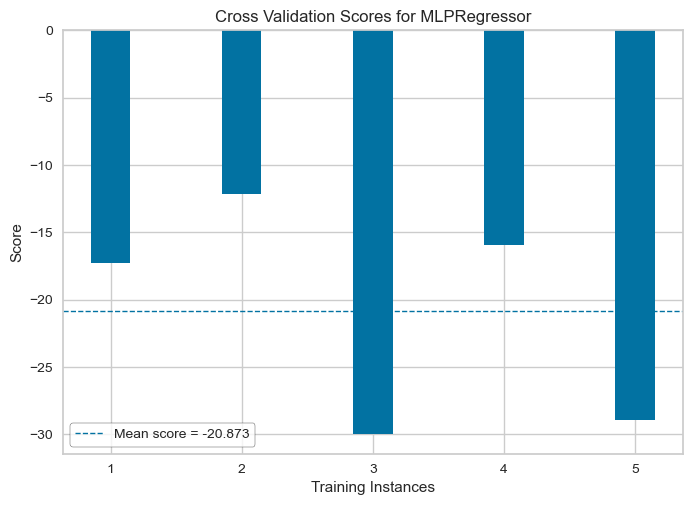

In [8]:
from yellowbrick.model_selection import cv_scores
visulazizer = cv_scores (final_model, X, y, cv=kfold, scoring="neg_mean_absolute_error")

Split the data into training and testing and calcuate metrics for testing dataset

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)
final_model_2=final_model.fit(X_train, y_train)
y_pred_test=final_model_2.predict (X_test)
r2_test=r2_score (y_pred_test, y_test)
rmse_test=mean_squared_error (y_pred_test, y_test, squared=False)
print (r2_test, rmse_test)


-2.1253826333763605e+30 20.717567536639315


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


metrics for training dataset

In [10]:
y_pred_train=final_model_2.predict (X_train)
r2_train=r2_score (y_pred_train, y_train)
rmse_train=mean_squared_error (y_pred_train, y_train, squared=False)
print (r2_train, rmse_test)

0.0 20.717567536639315


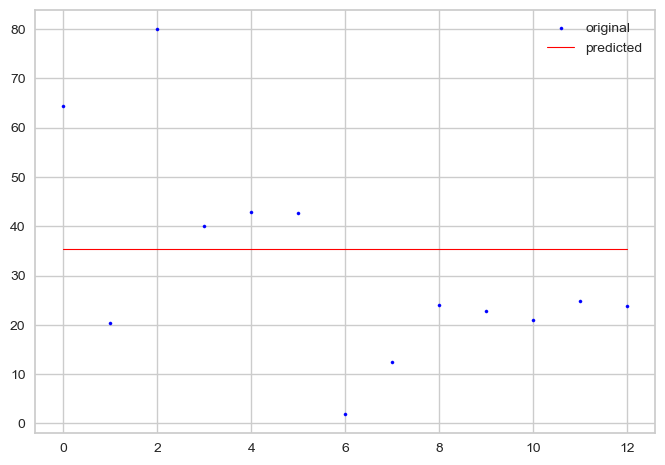

In [11]:
x_axes = range(len(y_pred_test))
plt.scatter(x_axes, y_test, s=5, color="blue", label="original")
plt.plot(x_axes, y_pred_test, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()


In [5]:
data_1=rasterio.open ("D:/Mip and TSS Project/Python_SSC_MP_S2_Planetscope/SSC-S1/subset_4_of_26-12-2022.tif")
data_2=data_1.read ()
data_3=np.swapaxes (data_2, 0, 2)
data_3=np.swapaxes (data_3, 0, 1)
data_3 = data_3.reshape (data_3.shape [0]*data_3.shape [1], data_3.shape [2])
prediction = final_model.predict (data_3)
prediction=prediction.reshape (1,data_2.shape [1] , data_2.shape [2])
prediction=prediction.astype (np.int32)
with rasterio.open ("D:/Mip and TSS Project/Python_SSC_MP_S2_Planetscope/MP-S1/MP_direct_S1_subset_4_of_26-12-2022.tif", 'w',
                    driver="GTiff", 
                   width=data_2.shape [2], 
                   height=data_2.shape [1],
                   count=1, 
                   crs=data_1.crs, 
                   transform=data_1.transform, 
                   dtype=rasterio.int32) as dst:
    dst.write (prediction)